# Big Mart Sales Prediction

**Problem Statement**

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.

Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly. 


**Data Dictionary**

We have train (8523) and test (5681) data set, train data set has both input and output variable(s). You need to predict the sales for test data set.

Train file: CSV containing the item outlet information with sales value

Variable: Description
- Item_Identifier: Unique product ID
- Item_Weight: Weight of product
- Item_Fat_Content: Whether the product is low fat or not
- Item_Visibility: The % of total display area of all products in a store allocated to the particular product
- Item_Type: The category to which the product belongs
- Item_MRP: Maximum Retail Price (list price) of the product
- Outlet_Identifier: Unique store ID
- Outlet_Establishment_Year: The year in which store was established
- Outlet_Size: The size of the store in terms of ground area covered
- Outlet_Location_Type: The type of city in which the store is located
- Outlet_Type: Whether the outlet is just a grocery store or some sort of supermarket
- Item_Outlet_Sales: Sales of the product in the particular store. This is the outcome variable to be predicted.


Test file: CSV containing item outlet combinations for which sales need to be forecasted

Variable: Description
- Item_Identifier: Unique product ID
- Item_Weight: Weight of product
- Item_Fat_Content: Whether the product is low fat or not
- Item_Visibility: The % of total display area of all products in a store allocated to the particular product
- Item_Type: The category to which the product belongs
- Item_MRP: Maximum Retail Price (list price) of the product
- Outlet_Identifier: Unique store ID
- Outlet_Establishment_Year: The year in which store was established
- Outlet_Size: The size of the store in terms of ground area covered
- Outlet_Location_Type: The type of city in which the store is located
- Outlet_Type: Whether the outlet is just a grocery store or some sort of supermarket

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
plt.rcParams['figure.figsize'] = [15,8]

In [5]:
from scipy import stats as st
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

from sklearn.model_selection import train_test_split

from sklearn.metrics import *
import math

from sklearn.model_selection import GridSearchCV

## Load the CSV files

In [6]:
train = pd.read_csv("train.csv")
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [7]:
train.shape

(8523, 12)

In [8]:
test = pd.read_csv("test.csv")
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [9]:
test.shape

(5681, 11)

## Merge train and test csv files

In [10]:
data = pd.concat([train,test],axis =0,ignore_index=True,sort=False)
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [11]:
df = data.copy()

In [12]:
df.shape

(14204, 12)

## Understanding the data

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


**Inference**
* The combined dataset, created by merging the training and testing data, has 14,204 rows and 12 columns in total.
* The training data includes 8,523 rows with 12 columns, while the testing data contains 5,681 rows and 11 columns, lacking the target variable.
* This dataset comprises 5 integer columns and 7 categorical (object) columns.
* Missing values are present in the Item_Weight column (numeric) and the Outlet_Size column (categorical). For the numeric column, we can assess outliers to decide whether to impute missing values using the mean or median, while for the categorical column, we can impute missing values using the mode.
* Missing values in the Item_Outlet_Sales column correspond to the target variable, which is absent in the testing data. The objective is to predict Item_Outlet_Sales for the testing set after model development.

## Checking duplicate values

In [14]:
df.duplicated().sum()

0

**Inference**
* There are no duplicate values present in the dataset.

## Check for anamolies

##### Item_Identifier	

In [15]:
df['Item_Identifier'].unique()

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      dtype=object)

In [16]:
df['Item_Identifier'].value_counts()

Item_Identifier
FDU15    10
FDS25    10
FDA38    10
FDW03    10
FDJ10    10
         ..
FDR51     7
FDM52     7
DRN11     7
FDH58     7
NCW54     7
Name: count, Length: 1559, dtype: int64

##### Item_Fat_Content

In [17]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [18]:
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: count, dtype: int64

**Inference**
* Some values in this column are repeated or presented in different formats (e.g., "Low Fat," "low fat," "LF" and "Regular," "reg"). These should be standardized to a single, consistent format.

In [19]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'})

In [20]:
(df['Item_Fat_Content'].value_counts(normalize=True))*100

Item_Fat_Content
Low Fat    64.664883
Regular    35.335117
Name: proportion, dtype: float64

##### Item_Type

In [21]:
df['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [22]:
(df['Item_Type'].value_counts(normalize=True))*100

Item_Type
Fruits and Vegetables    14.172064
Snack Foods              14.003098
Household                10.898338
Frozen Foods             10.039426
Dairy                     7.997747
Baking Goods              7.645734
Canned                    7.631653
Health and Hygiene        6.040552
Meat                      5.181639
Soft Drinks               5.111236
Breads                    2.928752
Hard Drinks               2.548578
Others                    1.971276
Starchy Foods             1.893833
Breakfast                 1.309490
Seafood                   0.626584
Name: proportion, dtype: float64

##### Outlet_Identifier

In [23]:
df['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [24]:
(df['Outlet_Identifier'].value_counts(normalize=True))*100

Outlet_Identifier
OUT027    10.975781
OUT013    10.933540
OUT049    10.912419
OUT046    10.912419
OUT035    10.912419
OUT045    10.898338
OUT018    10.884258
OUT017    10.863137
OUT010     6.512250
OUT019     6.195438
Name: proportion, dtype: float64

##### Outlet_Size

In [25]:
df['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [26]:
(df['Outlet_Size'].value_counts(normalize=True))*100

Outlet_Size
Medium    45.691009
Small     39.065567
High      15.243424
Name: proportion, dtype: float64

**Inference**
* This column contains some missing values. Further analysis is needed to determine the best approach for imputing these values.

##### Outlet_Location_Type

In [27]:
df['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [28]:
(df['Outlet_Location_Type'].value_counts(normalize=True))*100

Outlet_Location_Type
Tier 3    39.305829
Tier 2    32.673895
Tier 1    28.020276
Name: proportion, dtype: float64

##### Outlet_Type

In [29]:
df['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [30]:
(df['Outlet_Type'].value_counts(normalize=True))*100

Outlet_Type
Supermarket Type1    65.432273
Grocery Store        12.707688
Supermarket Type3    10.975781
Supermarket Type2    10.884258
Name: proportion, dtype: float64

## Separating numeric and categoric

In [31]:
num = df.select_dtypes(include=np.number).columns.to_list()
cat = df.select_dtypes(exclude=np.number).columns.to_list()

In [32]:
num

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

In [33]:
cat

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

## Basic Analysis

In [34]:
df[num].describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


**Inference**
* No anomalies are present in the numeric columns. However, some missing values exist in the Item_Weight column, which may require further analysis to decide on an appropriate imputation method.

In [35]:
df[cat].describe()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,14204,14204,14204,14204,10188,14204,14204
unique,1559,2,16,10,3,3,4
top,FDU15,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,9185,2013,1559,4655,5583,9294


**Inference**
* The Item_Identifier column has 1,559 unique values, with FDU15 being the most frequent identifier.
* The Item_Fat_Content column has 2 unique values, with the majority of items labeled as Low Fat.
* The Item_Type column contains 16 unique values, with Fruits and Vegetables being the most common item type.
* The Outlet_Identifier column has 10 unique values, with OUT027 being the most frequent outlet.
* The Outlet_Size column has 3 unique values, with the majority of outlets being Medium in size.
* The Outlet_Location_Type column has 3 unique values, with most outlets located in Tier 3 areas.
* The Outlet_Type column contains 4 unique values, with Supermarket Type1 being the most common outlet type.

## Checking Null values

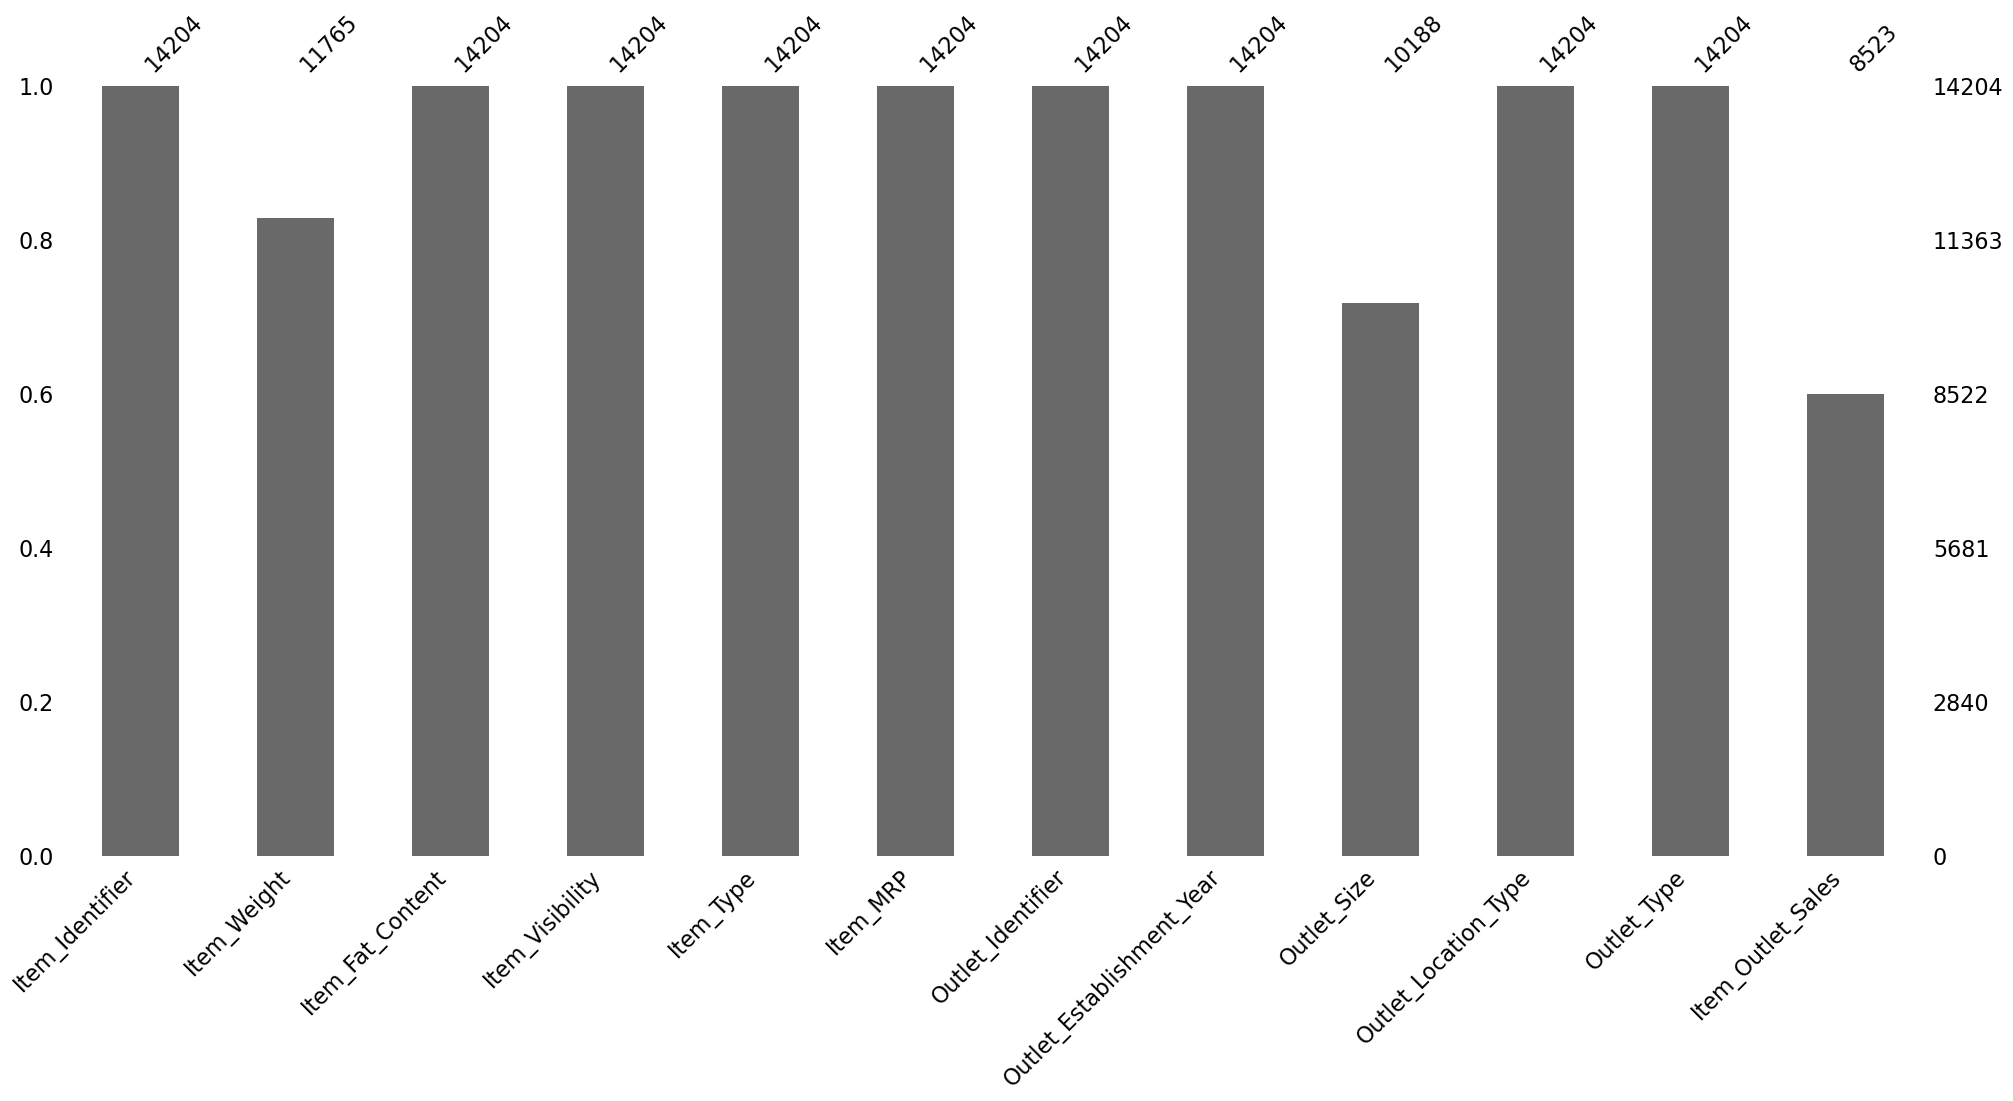

In [36]:
import missingno as msno
msno.bar(df)
plt.show()

In [37]:
(df.isnull().sum()/len(df))*100

Item_Identifier               0.000000
Item_Weight                  17.171219
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.273726
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales            39.995776
dtype: float64

**Inference**
* As previously mentioned, the Item_Weight column contains 17% null values, and the Outlet_Size column has 28% null values. Further analysis is needed to determine the best approach for imputing these missing values appropriately.

## Outlier Treatment

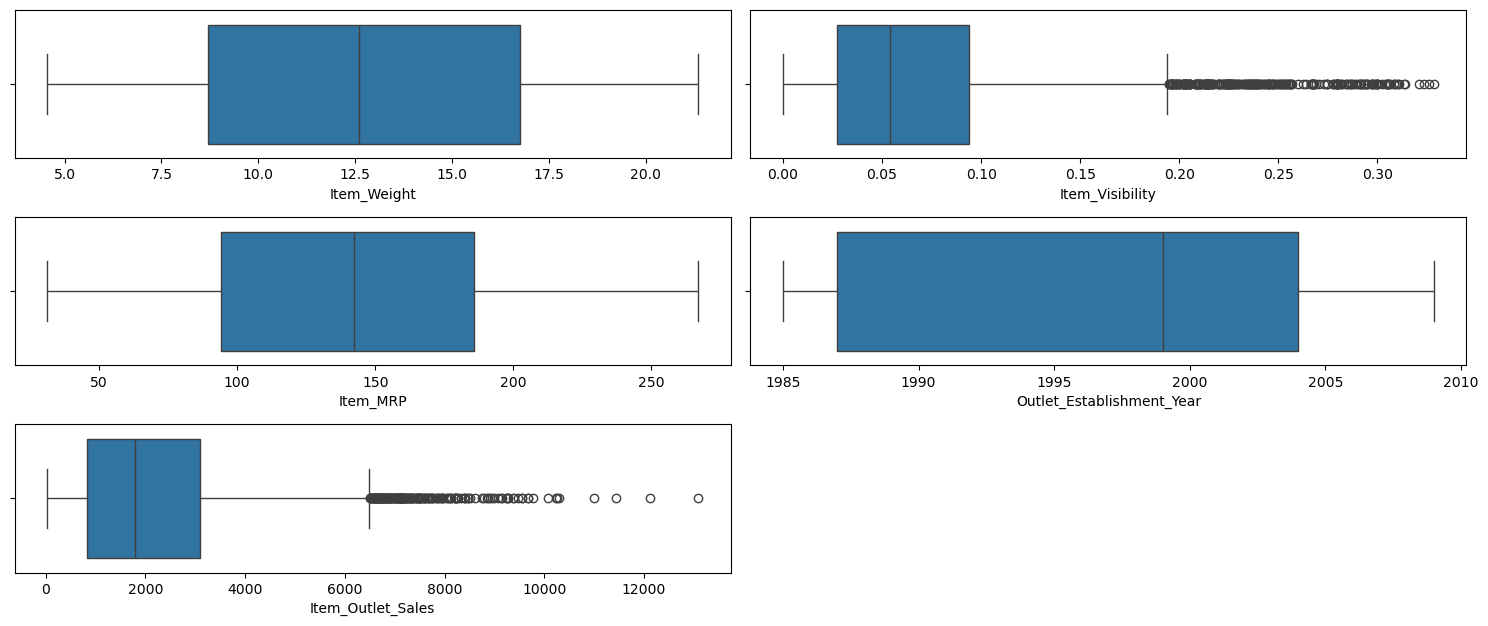

In [38]:
t=1
for i in num:
    plt.subplot(4,2,t)
    sns.boxplot(x= df[i])
    t+=1
plt.tight_layout()
plt.show()

In [39]:
q1 = df[num].quantile(0.25)
q3 = df[num].quantile(0.75)

iqr = q3-q1

ll = q1 - (1.5*iqr)
ul = q3 + (1.5*iqr)

print(ll)
print(ul)

Item_Weight                    -3.350000
Item_Visibility                -0.073467
Item_MRP                      -43.753400
Outlet_Establishment_Year    1961.500000
Item_Outlet_Sales           -2566.326100
dtype: float64
Item_Weight                    28.81000
Item_Visibility                 0.19454
Item_MRP                      323.62100
Outlet_Establishment_Year    2029.50000
Item_Outlet_Sales            6501.86990
dtype: float64


In [40]:
df[((df[num]<ll)|(df[num]>ul)).any(axis=1)].shape

(447, 12)

In [41]:
(df[((df[num]<ll)|(df[num]>ul)).any(axis=1)].shape[0]/df.shape[0])*100

3.147000844832441

**Inference**
* The dataset contains only 3% outliers, which is a relatively low proportion. Therefore, we will retain them in the dataset for now, as their impact on the overall analysis and model performance is likely minimal.

### Null value imputation

##### Item_Weight

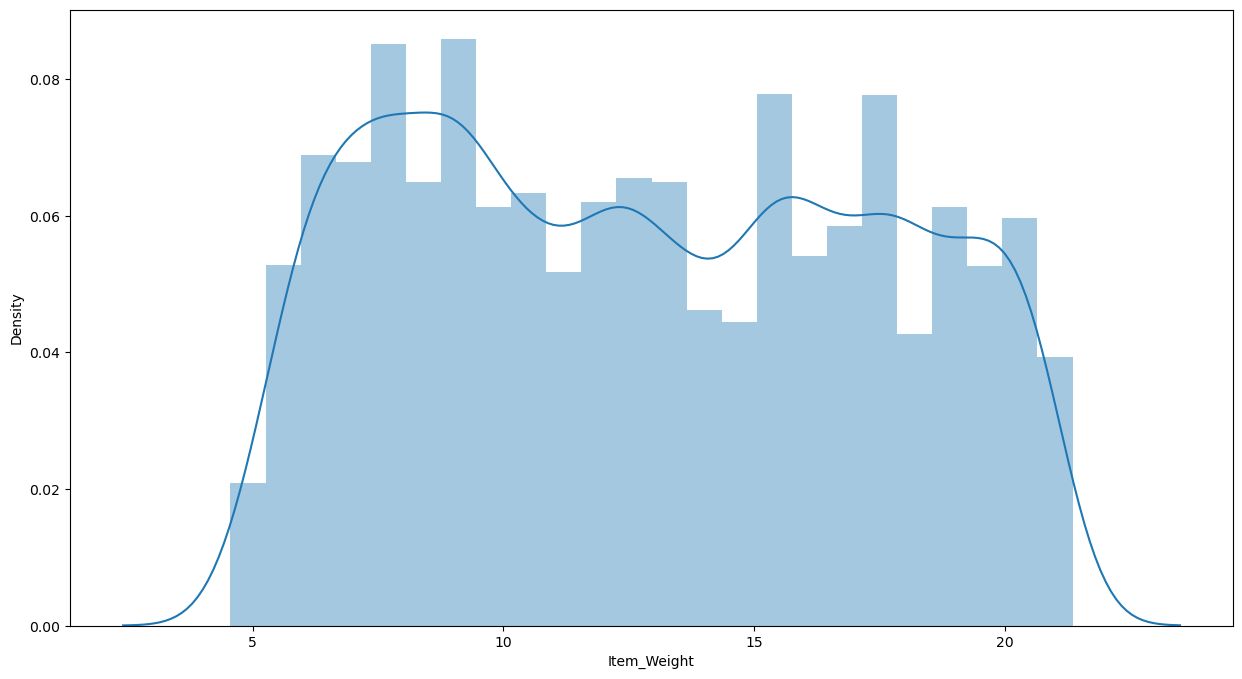

In [42]:
sns.distplot(df['Item_Weight'])
plt.show()

In [43]:
df['Item_Weight'].skew()

0.10130935278560388

In [44]:
df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Weight'].mean())

**Inference**
* The Item_Weight column does not contain any outliers and exhibits a distribution that is close to normal. The skewness value is low, indicating minimal deviation from symmetry. Therefore, we can impute the null values using the mean, which will help maintain the integrity of the dataset without introducing significant bias.

In [45]:
df.head(1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138


##### Outlet_Size

In [46]:
df.groupby(by='Outlet_Size')['Item_Outlet_Sales'].mean()

Outlet_Size
High      2298.995256
Medium    2681.603542
Small     1912.149161
Name: Item_Outlet_Sales, dtype: float64

In [47]:
ind1 = df[df['Outlet_Size'].isnull()].index

In [48]:
for ind in ind1:
    if (df.loc[ind, 'Item_Outlet_Sales'])<2100:
        df.loc[ind, 'Outlet_Size'] = 'Small'
    elif (df.loc[ind, 'Item_Outlet_Sales'])>2500:
        df.loc[ind, 'Outlet_Size'] = 'Medium'
    else:
        df.loc[ind, 'Outlet_Size'] = 'High'

**Inference**
* The Outlet_Size column has over 28% missing values, making it challenging to impute these with the mode without potentially introducing bias. As a solution, we will examine the mean Item_Outlet_Sales for each Outlet_Size category and consider imputing the missing values based on this distribution, which may provide a more balanced approach.

## Univariate Analysis

#### Numeric columns

In [49]:
df[num].skew()

Item_Weight                  0.111314
Item_Visibility              1.195175
Item_MRP                     0.130728
Outlet_Establishment_Year   -0.396465
Item_Outlet_Sales            1.177531
dtype: float64

**Inference**
* The Item_Visibility column has a skewness of 1.195, indicating a significant positive skew. This suggests that most values are concentrated on the lower end of the scale, with a few high values potentially influencing the distribution.
* The Item_Outlet_Sales column also shows positive skewness at 1.178, indicating that sales values are skewed toward the lower end, with a presence of higher sales figures that may impact the overall distribution.

In [50]:
df[num].kurt()

Item_Weight                 -0.860626
Item_Visibility              1.820071
Item_MRP                    -0.893856
Outlet_Establishment_Year   -1.205867
Item_Outlet_Sales            1.615877
dtype: float64

**Inference**
* The Item_Visibility column has a kurtosis of 1.820, indicating a leptokurtic distribution. This suggests a higher peak and heavier tails compared to a normal distribution, meaning there are more extreme values than would be expected in a normal distribution.
* The Item_Outlet_Sales column shows a kurtosis of 1.616, also indicating a leptokurtic distribution. This implies that sales data has a higher likelihood of producing extreme values, which may affect statistical analyses and modeling approaches.

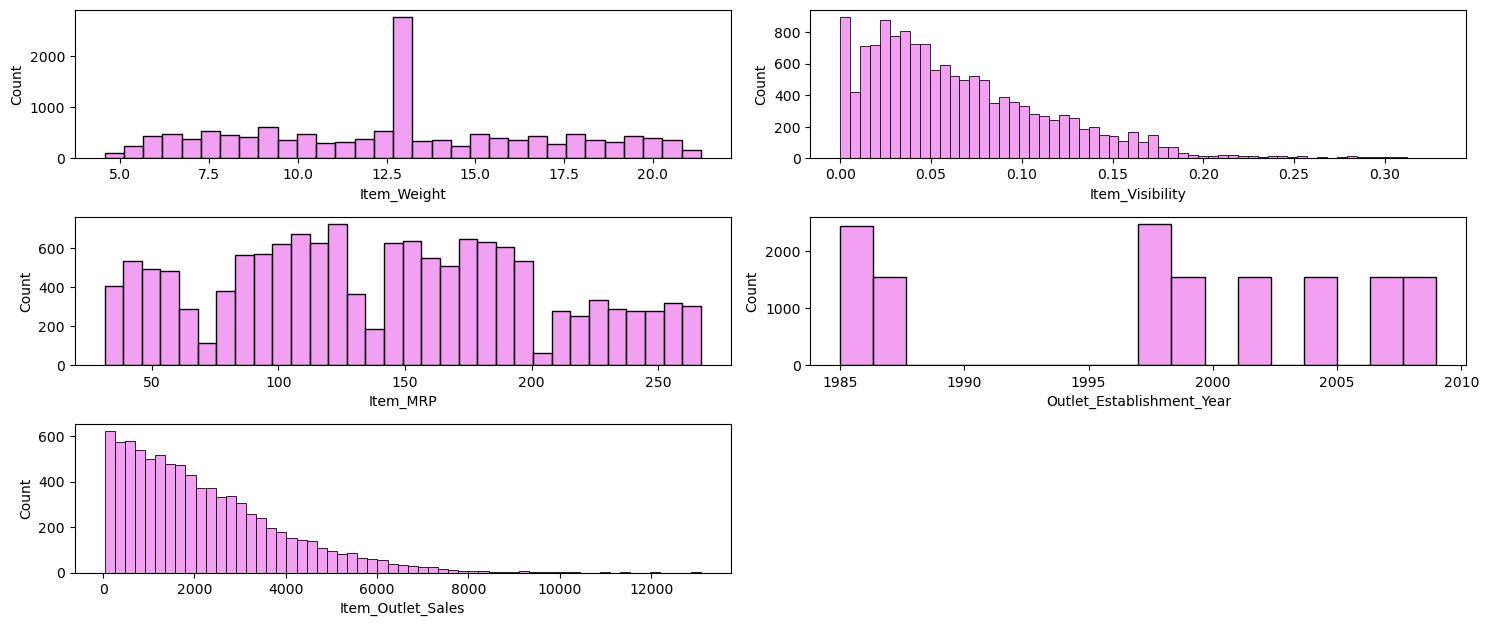

In [51]:
t=1

for i in num:
    plt.subplot(4,2,t)
    sns.histplot(df[i], color='violet')
    t+=1

plt.tight_layout()
plt.show()

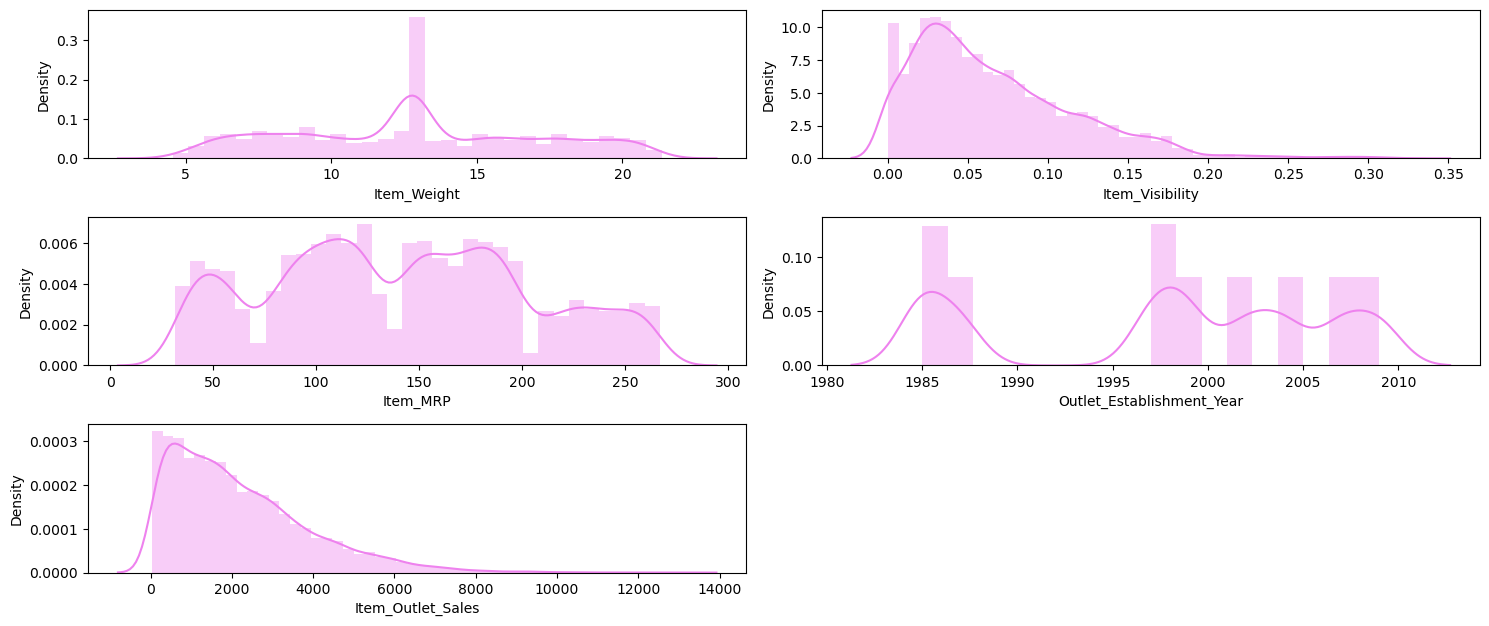

In [52]:
t = 1

for i in num:
    plt.subplot(4,2,t)
    sns.distplot(df[i], color='violet')
    t+=1

plt.tight_layout()
plt.show()

#### Categoric columns

In [53]:
for i in cat:
    print(i, df[i].unique())
    print("---------------------------")
    print()

Item_Identifier ['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']
---------------------------

Item_Fat_Content ['Low Fat' 'Regular']
---------------------------

Item_Type ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
---------------------------

Outlet_Identifier ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
---------------------------

Outlet_Size ['Medium' 'Small' 'High']
---------------------------

Outlet_Location_Type ['Tier 1' 'Tier 3' 'Tier 2']
---------------------------

Outlet_Type ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']
---------------------------



In [54]:
for i in cat:
    print((df[i].value_counts(normalize=True))*100)
    print()

Item_Identifier
FDU15    0.070403
FDS25    0.070403
FDA38    0.070403
FDW03    0.070403
FDJ10    0.070403
           ...   
FDR51    0.049282
FDM52    0.049282
DRN11    0.049282
FDH58    0.049282
NCW54    0.049282
Name: proportion, Length: 1559, dtype: float64

Item_Fat_Content
Low Fat    64.664883
Regular    35.335117
Name: proportion, dtype: float64

Item_Type
Fruits and Vegetables    14.172064
Snack Foods              14.003098
Household                10.898338
Frozen Foods             10.039426
Dairy                     7.997747
Baking Goods              7.645734
Canned                    7.631653
Health and Hygiene        6.040552
Meat                      5.181639
Soft Drinks               5.111236
Breads                    2.928752
Hard Drinks               2.548578
Others                    1.971276
Starchy Foods             1.893833
Breakfast                 1.309490
Seafood                   0.626584
Name: proportion, dtype: float64

Outlet_Identifier
OUT027    10.975781
OUT

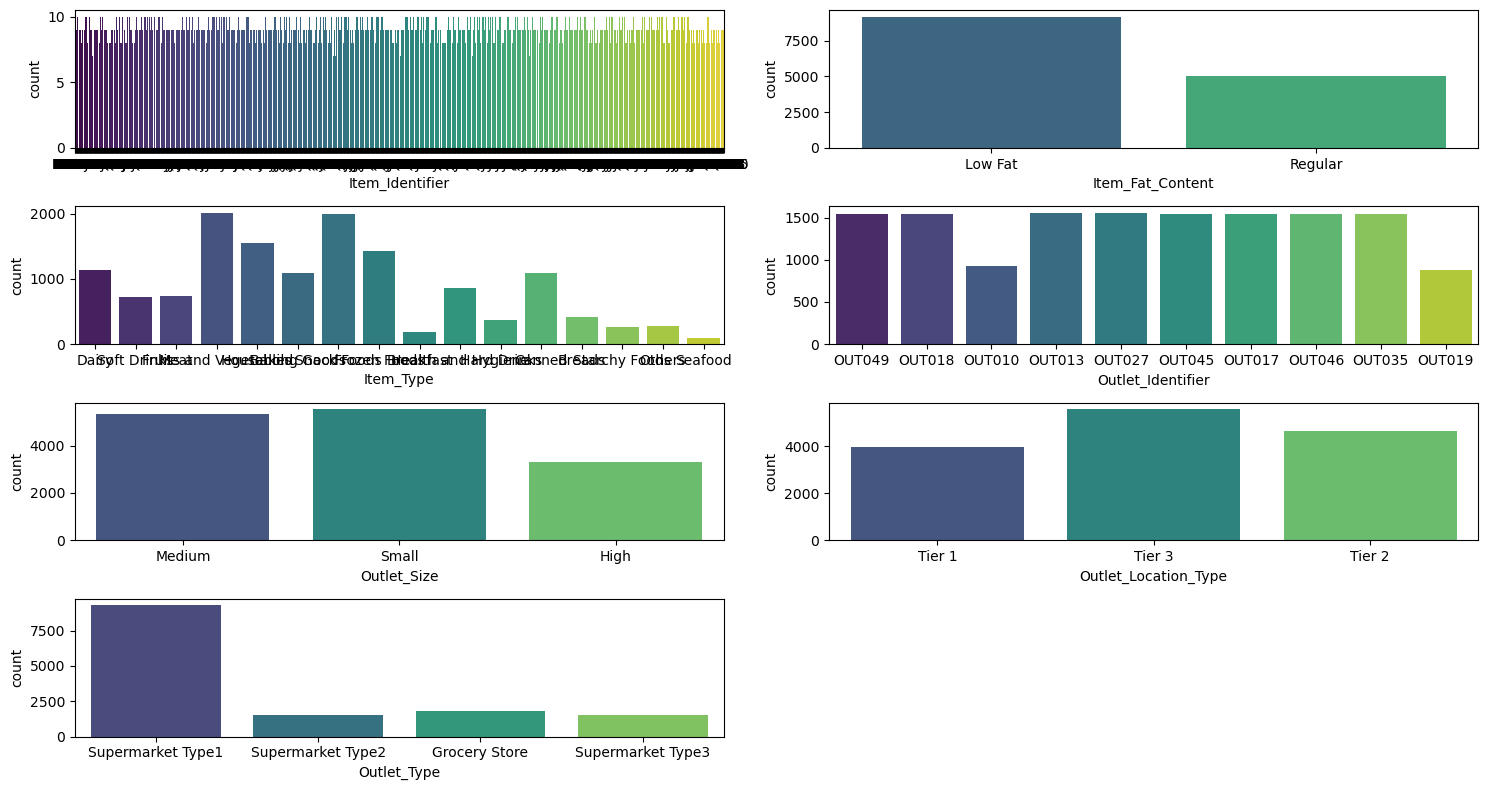

In [55]:
t = 1

for i in cat:
    plt.subplot(4,2,t)
    sns.countplot(x=df[i], palette='viridis')
    t+=1

plt.tight_layout()
plt.show()

## Bivariate Analysis

#### lets check outlet_establishment_year distribution

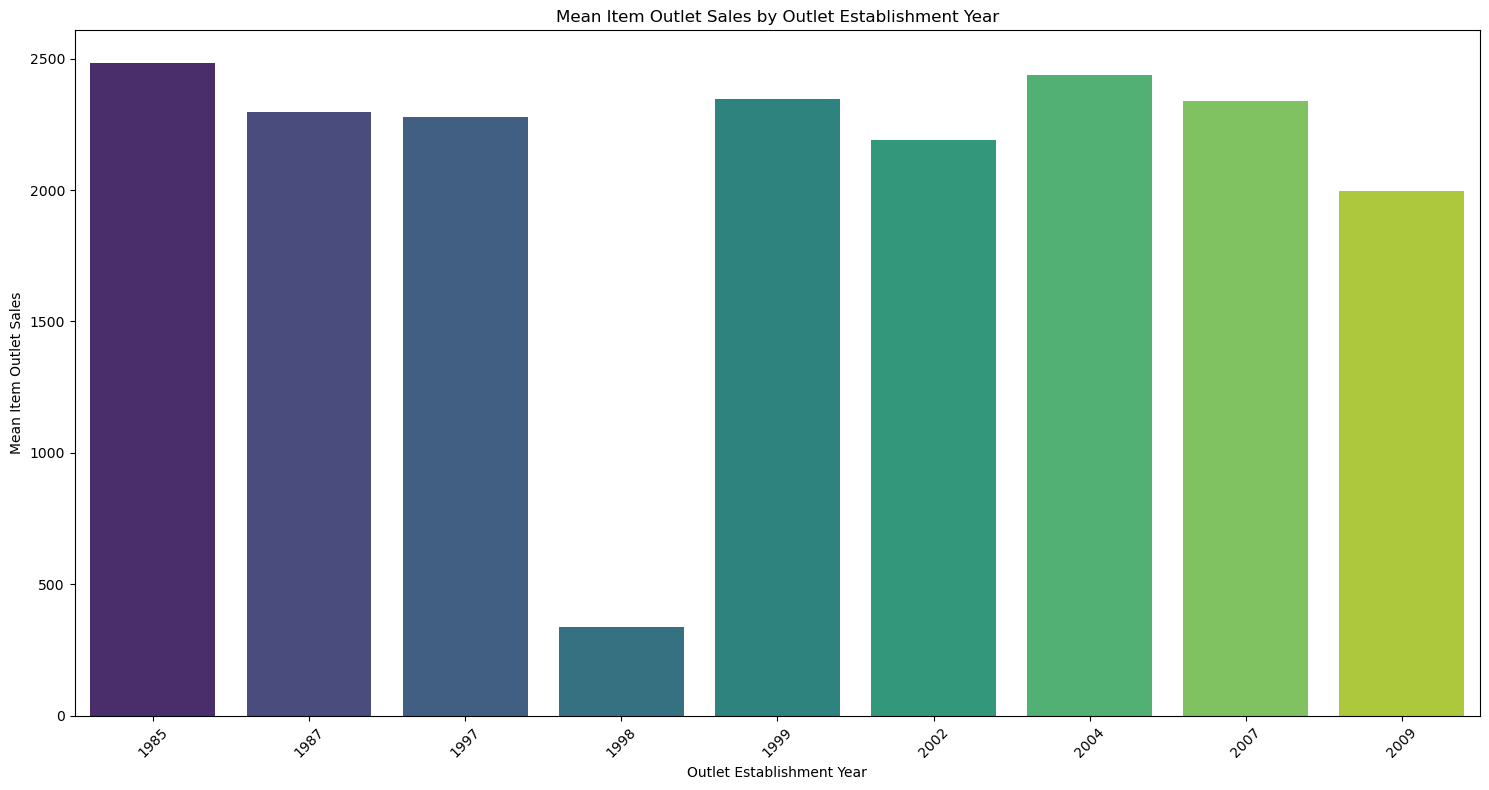

In [56]:
mean_sales_by_year = df.groupby(by='Outlet_Establishment_Year')['Item_Outlet_Sales'].mean().reset_index()

sns.barplot(data=mean_sales_by_year, x='Outlet_Establishment_Year', y='Item_Outlet_Sales', palette='viridis')

plt.xlabel("Outlet Establishment Year")
plt.ylabel("Mean Item Outlet Sales")
plt.title("Mean Item Outlet Sales by Outlet Establishment Year")
plt.xticks(rotation=45) 
plt.tight_layout()  
plt.show()

**Inference**
* In 1998, the average item outlet sales were significantly lower compared to other years. Sales in subsequent years showed a higher average, indicating a general trend of increased sales over time.

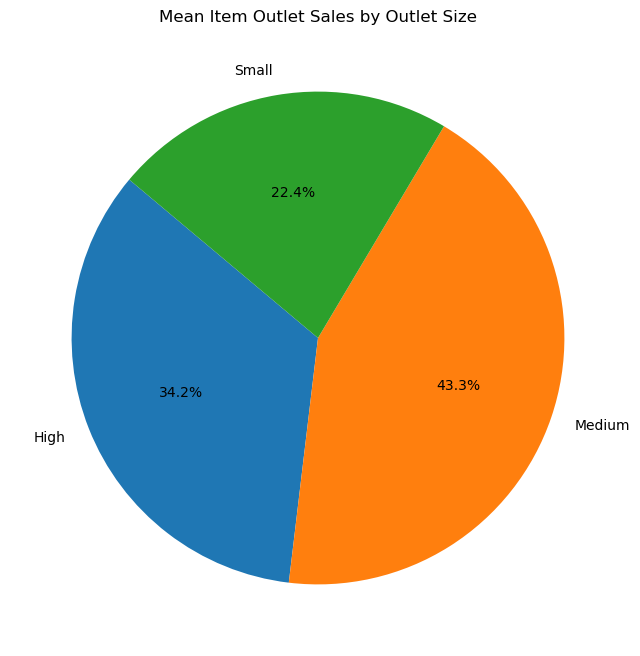

In [57]:
outlet_sales_means = df.groupby(by='Outlet_Size')['Item_Outlet_Sales'].mean()

plt.pie(outlet_sales_means, labels=outlet_sales_means.index, autopct='%1.1f%%', startangle=140)
plt.title("Mean Item Outlet Sales by Outlet Size")
plt.show()

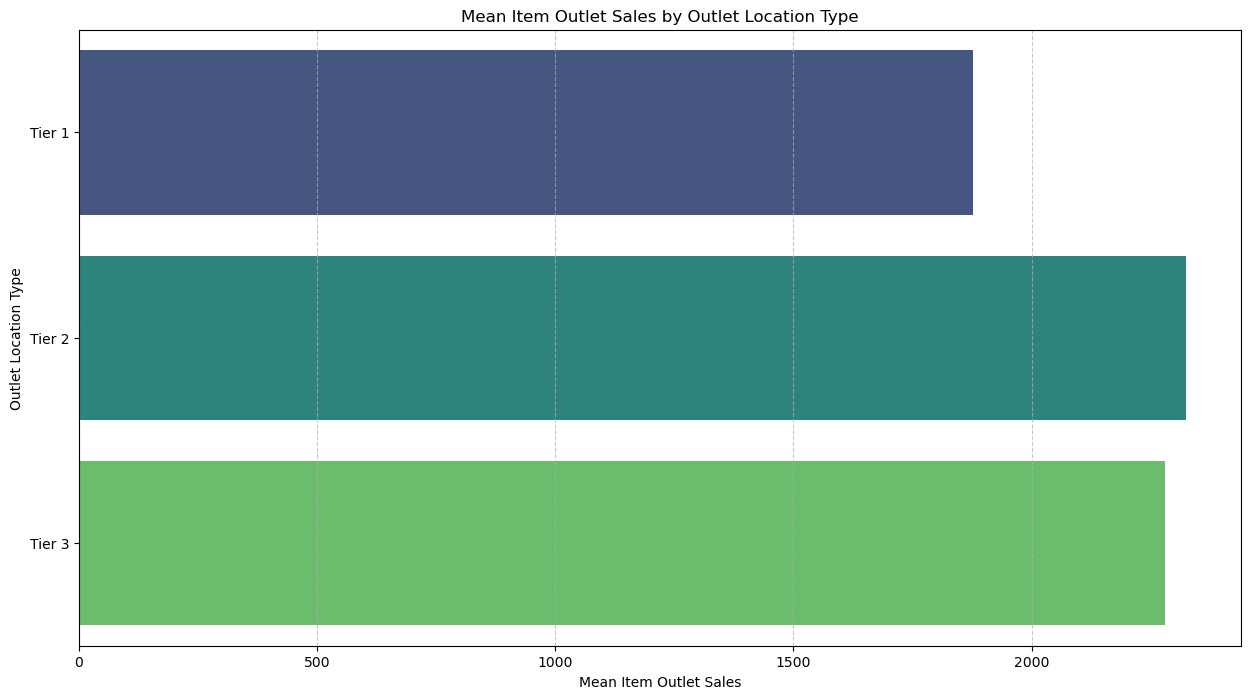

In [58]:
location_sales_means = df.groupby(by='Outlet_Location_Type')['Item_Outlet_Sales'].mean()

sns.barplot(x=location_sales_means.values, y=location_sales_means.index, palette='viridis')
plt.xlabel("Mean Item Outlet Sales")
plt.ylabel("Outlet Location Type")
plt.title("Mean Item Outlet Sales by Outlet Location Type")
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

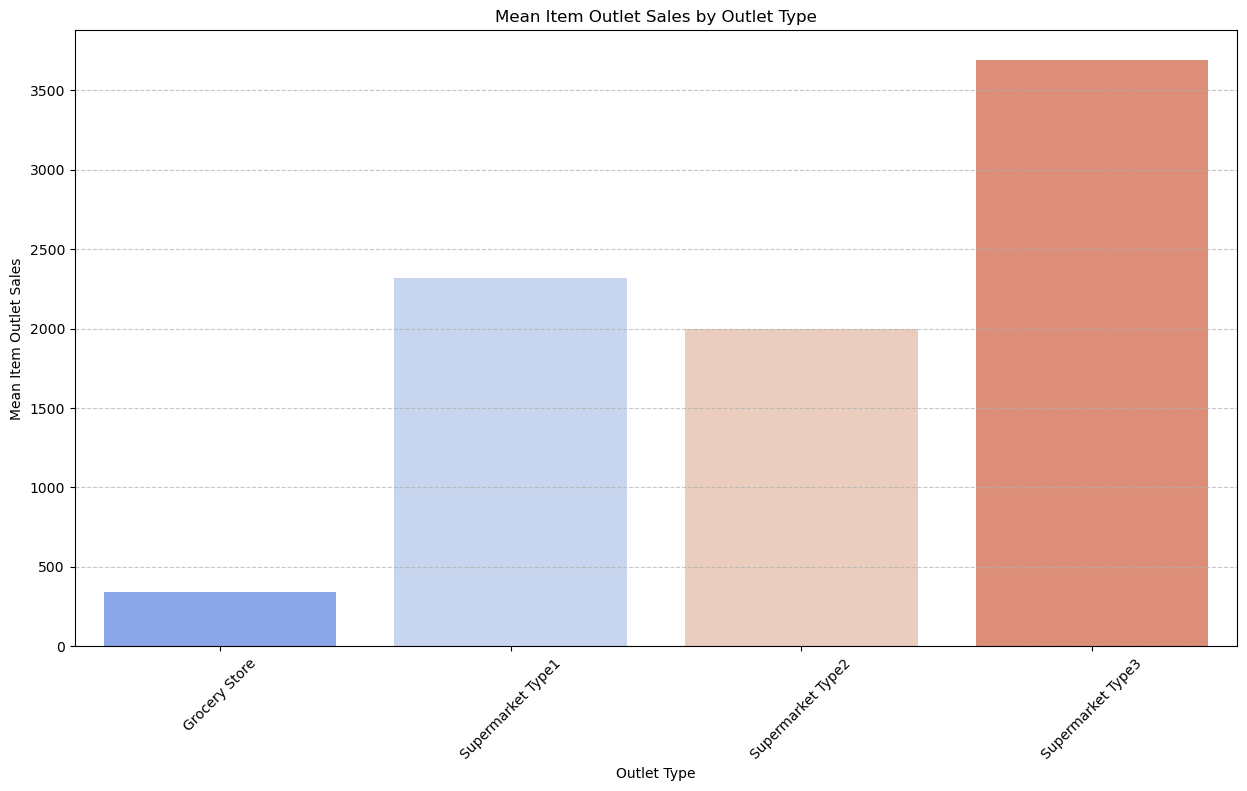

In [59]:
type_sales_means = df.groupby(by='Outlet_Type')['Item_Outlet_Sales'].mean()

sns.barplot(x=type_sales_means.index, y=type_sales_means.values, palette='coolwarm')

plt.xlabel("Outlet Type")
plt.ylabel("Mean Item Outlet Sales")
plt.title("Mean Item Outlet Sales by Outlet Type")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

## Multivariate Analysis

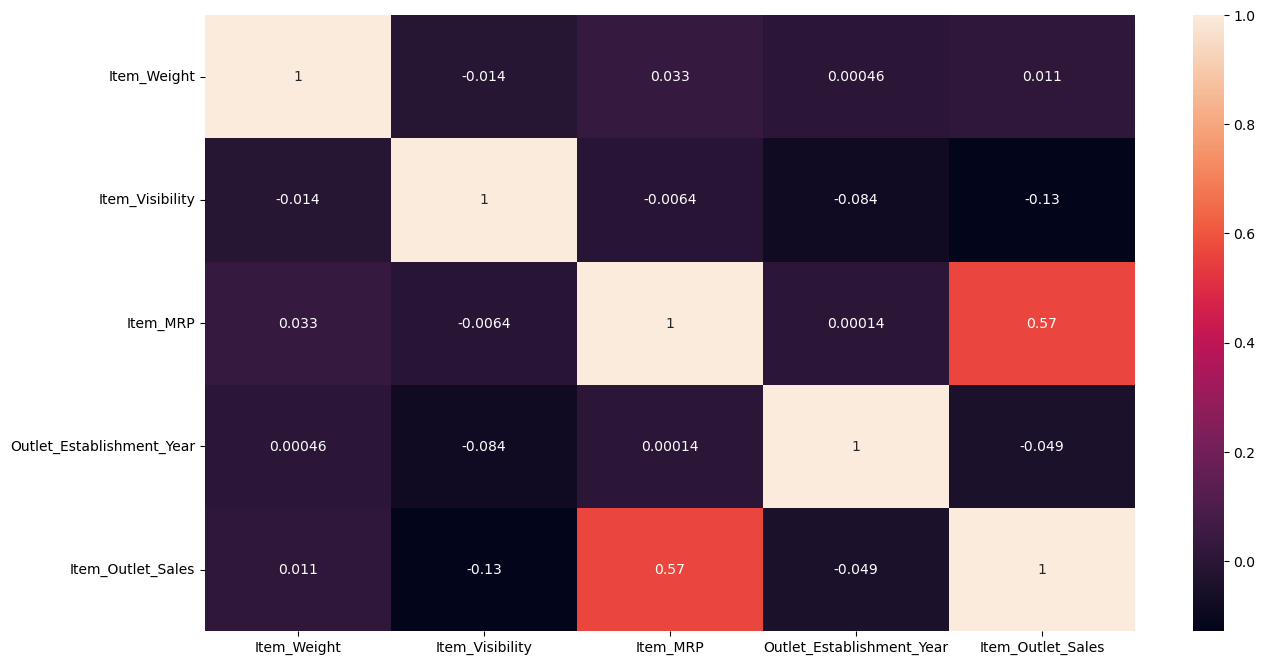

In [60]:
sns.heatmap(df[num].corr(), annot=True, cbar='viridis')
plt.show()

**Inference**
* Item_MRP and Item_Outlet_Sales have a moderate positive correlation of 0.568. This indicates that as the Item_MRP (Maximum Retail Price) increases, the Item_Outlet_Sales tend to increase as well, suggesting that higher-priced items may generally yield higher sales.
* Item_Visibility and Item_Outlet_Sales have a weak negative correlation of -0.129. This suggests a slight inverse relationship, meaning that as the visibility of an item increases, the sales tend to decrease, although the effect is not very strong.
* Item_Visibility and Outlet_Establishment_Year also have a weak negative correlation of -0.084. This may indicate that newer outlets might stock items with lower visibility, although the correlation is minimal and should be interpreted with caution.

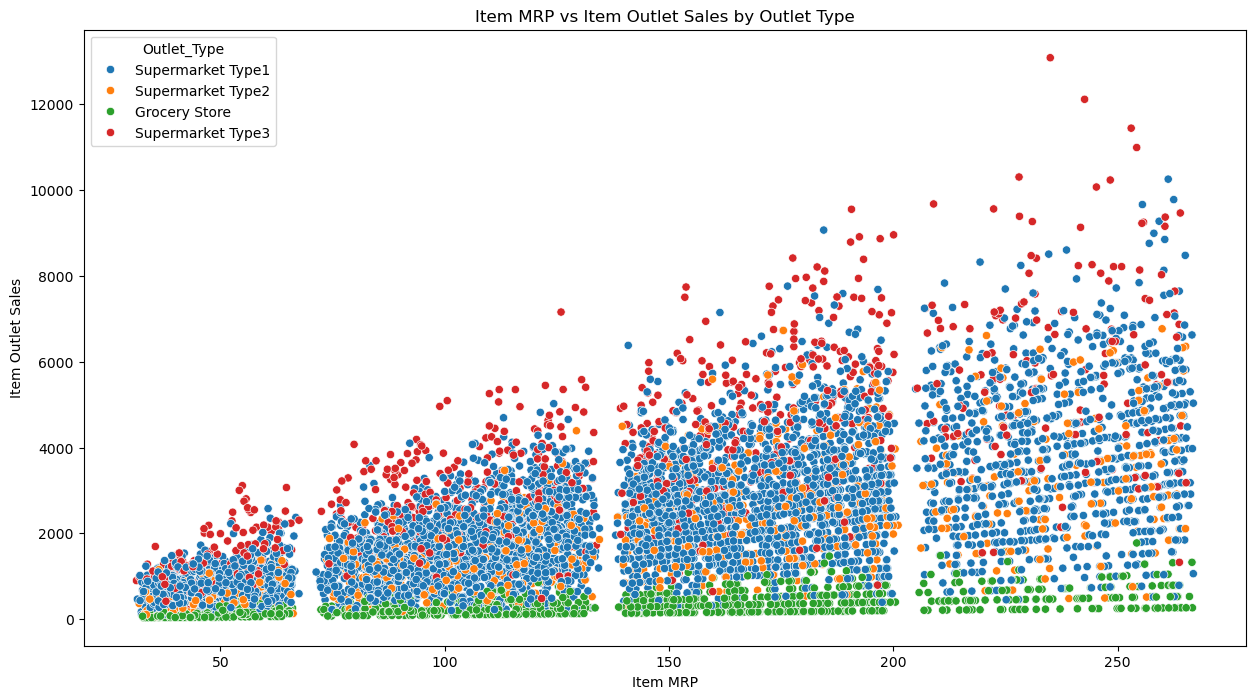

In [61]:
sns.scatterplot(x=df['Item_MRP'], y=df['Item_Outlet_Sales'], hue=df['Outlet_Type'])
plt.xlabel("Item MRP")
plt.ylabel("Item Outlet Sales")
plt.title("Item MRP vs Item Outlet Sales by Outlet Type")
plt.show()

## Feature Engineering

### Transformation

In [62]:
num1 = ['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year']

In [63]:
pt = PowerTransformer()
df[num1] = pt.fit_transform(df[num1])
df[num1].head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,-0.802547,-1.149234,1.627127,0.048775
1,-1.724413,-1.038844,-1.602725,1.461977
2,1.097481,-1.124586,0.081649,0.048775
3,1.453444,-1.751417,0.691973,-0.075581
4,-0.898078,-1.751417,-1.482968,-1.270716


In [64]:
df[num1].skew()

Item_Weight                 -0.065230
Item_Visibility              0.121332
Item_MRP                    -0.113637
Outlet_Establishment_Year   -0.200960
dtype: float64

**Inference**
* The Yeo-Johnson transformation successfully reduced skewness across all columns, especially in Item_Visibility where skewness was reduced from 1.195 to 0.121. This indicates a more normalized distribution, which may improve model performance and stability.
* The skewness of other columns, such as Item_Weight and Item_MRP, was also adjusted closer to zero, making these distributions more symmetric and less likely to introduce bias in the analysis or model.

### Scaling the data

In [65]:
df_sc = df.copy()

In [66]:
sc = StandardScaler()
df_sc[num1] = sc.fit_transform(df_sc[num1])
df_sc[num1].head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,-0.802547,-1.149234,1.627127,0.048775
1,-1.724413,-1.038844,-1.602725,1.461977
2,1.097481,-1.124586,0.081649,0.048775
3,1.453444,-1.751417,0.691973,-0.075581
4,-0.898078,-1.751417,-1.482968,-1.270716


In [67]:
df_sc[num1].skew()

Item_Weight                 -0.065230
Item_Visibility              0.121332
Item_MRP                    -0.113637
Outlet_Establishment_Year   -0.200960
dtype: float64

**Inference**
* The skewness values remained unchanged after applying the StandardScaler, confirming that scaling affects the data's range but does not alter its distribution shape. This means the Yeo-Johnson transformation was effective in normalizing the data, and scaling has now standardized the feature ranges without impacting skewness.

### Encoding

#### Label Encoding

##### Item_Identifier

In [68]:
le = LabelEncoder()

df['Item_Identifier'] = le.fit_transform(df['Item_Identifier'])

In [69]:
df['Item_Type'] = le.fit_transform(df['Item_Type'])

In [70]:
df['Outlet_Identifier'] = le.fit_transform(df['Outlet_Identifier'])

**Inference**
* The Item_Identifier column contains 1,559 unique values. We applied label encoding to convert each identifier into a unique numeric label, enabling the model to recognize these values without generating a high-dimensional feature set.
* The Item_Type column has 16 unique values. We also applied label encoding to convert each item type into a unique numeric label.
* The Outlet_Identifier column has 10 unique values. We also applied label encoding to convert each outlet identifier into a unique numeric variable.

#### One hot Encoding

##### Item_Fat_Content

In [71]:
df['Item_Fat_Content'] = pd.get_dummies(df['Item_Fat_Content'], drop_first=True, dtype=int)

**Inference**
* The Item_Fat_Content column contains 2 unique values, so one-hot encoding was applied, creating a binary representation that allows the model to interpret this categorical feature effectively.

#### Ordinal Encoding

In [72]:
ol = OrdinalEncoder()

In [73]:
df['Outlet_Size'] = ol.fit_transform(df[['Outlet_Size']])

**Inference**
* The Outlet_Size column has an inherent order, classified as 'Small', 'Medium', and 'High'. Therefore, we applied ordinal encoding to this column to represent these sizes as numeric values based on their ranking.

In [74]:
df['Outlet_Location_Type'] = df['Outlet_Location_Type'].replace({'Tier 1': 0, 'Tier 2': 1, 'Tier 3': 2}).astype('int64')

#### Target Encoding

##### Outlet_Type

In [75]:
df.pivot_table(index = 'Outlet_Type', values = 'Item_Outlet_Sales', aggfunc = 'mean').sort_values(by = 'Item_Outlet_Sales', ascending = True)

,Item_Outlet_Sales
Outlet_Type,
Grocery Store,339.828500
Supermarket Type2,1995.498739
Supermarket Type1,2316.181148
Supermarket Type3,3694.038558


In [76]:
df['Outlet_Type'] = df['Outlet_Type'].replace({'Grocery Store': 339.828500, 'Supermarket Type2': 1995.498739, 
                                               'Supermarket Type1': 2316.181148, 'Supermarket Type3': 3694.038558})

**Inference**
* The Outlet_Type column contains 4 unique values, but it does not have an inherent order. As a result, we cannot apply ordinal or label encoding. Instead, we utilized target encoding, calculating the mean values of the Item_Outlet_Sales column for each outlet type.

In [77]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,-0.802547,0,-1.149234,4,1.627127,9,0.048775,1.0,0,2316.181148,3735.1380
1,8,-1.724413,1,-1.038844,14,-1.602725,3,1.461977,1.0,2,1995.498739,443.4228
2,662,1.097481,0,-1.124586,10,0.081649,9,0.048775,1.0,0,2316.181148,2097.2700
3,1121,1.453444,1,-1.751417,6,0.691973,0,-0.075581,2.0,2,339.828500,732.3800
4,1297,-0.898078,0,-1.751417,9,-1.482968,1,-1.270716,0.0,2,2316.181148,994.7052


## Train and Test Split

In [78]:
train_data = df.iloc[:train.shape[0],:]
train_data.shape

(8523, 12)

In [79]:
test_data = df.iloc[train.shape[0]:,:]
test_data.shape

(5681, 12)

In [80]:
test_data.drop('Item_Outlet_Sales',axis=1,inplace=True)

### Split the independent and dependent data.

In [81]:
x = train_data.drop('Item_Outlet_Sales', axis=1)
y = train_data['Item_Outlet_Sales']

In [82]:
validate_data = test_data.copy()

In [83]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=.20,random_state=1999)

In [84]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(6818, 11)
(1705, 11)
(6818,)
(1705,)


## Inferential Statistics

In [85]:
import statsmodels.api as sma

In [86]:
# add_constant

xtrain_c = sma.add_constant(xtrain)

In [87]:
model1 = sma.OLS(ytrain, xtrain_c).fit()

In [88]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     795.3
Date:                Thu, 31 Oct 2024   Prob (F-statistic):               0.00
Time:                        15:38:08   Log-Likelihood:                -57574.
No. Observations:                6818   AIC:                         1.152e+05
Df Residuals:                    6806   BIC:                         1.153e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                       404.9416     82.559      4.905      0.000     243.100     566.783
Item_Identifier               0.0036      0.031      0.118      0.906      -0.056       0.064
Item_Weight                   3.8347     13.699      0.280      0.780     -23.020      30.690
Item_Fat_Content             36.7098     29.081      1.262      0.207     -20.298      93.717
Item_Visibility              -7.0485     13.903     -0.507      0.612     -34.303      20.206
Item_Type                    -3.1869      3.273     -0.974      0.330      -9.602       3.228
Item_MRP                    952.9143     13.712     69.494      0.000     926.034     979.795
Outlet_Identifier             3.0775      9.620      0.320      0.749     -15.780      21.935
Outlet_Establishment_Year    40.6756     14.247      2.855      0.004      12.747      68.604
Outlet_Size                -188.0420     24.447     -7.692      0.000    -235.967    -140.117
Outlet_Location_Type        -61.1025     31.848     -1.919      0.055    -123.535       1.330
Outlet_Type                   0.9548      0.025     38.817      0.000       0.907       1.003
==============================================================================
Omnibus:                      854.052   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1986.861
Skew:                           0.739   Prob(JB):                         0.00
Kurtosis:                       5.193   Cond. No.                     1.55e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.55e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Hypothesis testing for normality

- H0: Data/Residual are normally distributed
- H1: Data/Residual are not normally Distributed

In [89]:
## test of normality:

st.jarque_bera(model1.resid)

SignificanceResult(statistic=1986.8609173456782, pvalue=0.0)

- Test of Normality:
        - pval is less than siglvl, so reject H0

#### Hypothesis testing for Linearity

- H0: Data has linear relationship with the target
- H1: Data has no linear relationship with the target

In [90]:
## test of linearity

sma.stats.linear_rainbow(model1)

(0.977558305147021, 0.7460128555894515)

- Test of Linearity:
        - pval is greater than siglvl, so fail to reject H0.

#### Hypothesis testing for Heteroscedasticity

- H0: There is equal variance present in the data
- H1: There is unequal variance in the data

In [91]:
## Heteroscedasticity 

import statsmodels.stats.api as ssa

ssa.het_breuschpagan(model1.resid, model1.model.exog)

(904.437582930019,
 6.893182651208451e-187,
 94.62996406751463,
 7.945607561241988e-201)

- Heteroscedasticity: pval is less than siglvl, so reject H0.

### VIF to check multicollinearity

In [92]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [93]:
vif_list=[]

for i in range(xtrain.shape[1]):
    vif_list.append(variance_inflation_factor(xtrain.values, i))

pd.DataFrame({"Feature": xtrain.columns, "VIF" : vif_list}).sort_values(by='VIF', ascending=False)

,Feature,VIF
10,Outlet_Type,17.321525
6,Outlet_Identifier,12.940845
9,Outlet_Location_Type,7.335478
8,Outlet_Size,4.987458
0,Item_Identifier,3.703625
4,Item_Type,3.615471
2,Item_Fat_Content,1.535968
7,Outlet_Establishment_Year,1.077695
3,Item_Visibility,1.048237
5,Item_MRP,1.014871


##### Assumption of Linear regression

- Test of Normality: The results indicate a rejection of the null hypothesis (H0), suggesting that the data are not normally distributed.
- Test of Linearity: We failed to reject the null hypothesis (H0), indicating that there is a linear relationship between the predictors and the target variable.
- Multicollinearity Analysis: The Variance Inflation Factor (VIF) analysis revealed the presence of multicollinearity. Further analysis is needed to determine whether to remove multicollinear variables or to apply feature selection techniques.
- Durbin-Watson Test: The Durbin-Watson statistic is less than 2, suggesting the presence of autocorrelation in the residuals.
- Heteroscedasticity: The results of the heteroscedasticity test led to a rejection of the null hypothesis (H0), indicating that there is unequal variance in the data.

~ Assumptions of Linear Regression: The assumptions required for linear regression have not been met, as tests for normality, heteroscedasticity, multicollinearity, and autocorrelation did not pass. It is generally recommended that each assumption be satisfied for optimal results.

~ Implementation of Linear Regression: Despite these unmet assumptions, a linear regression model has been applied for demonstration purposes.

## Model Building

### Linear regression

In [94]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [95]:
linear = lr.fit(xtrain, ytrain)

pred_lr_train = linear.predict(xtrain)
pred_lr_test = linear.predict(xtest)

In [96]:
## MSE

print("MSE Train :", (mean_squared_error(ytrain, pred_lr_train)))
print("MSE Test :", (mean_squared_error(ytest, pred_lr_test)))

MSE Train : 1265542.8322410623
MSE Test : 1278465.2936679865


In [97]:
## RMSE

print("RMSE Train :", np.sqrt(mean_squared_error(ytrain, pred_lr_train)))
print("RMSE Test :", np.sqrt(mean_squared_error(ytest, pred_lr_test)))

RMSE Train : 1124.9634804032805
RMSE Test : 1130.6923956885828


In [98]:
## MAE

print("MAE Train :", mean_absolute_error(ytrain, pred_lr_train))
print("MAE Test :", mean_absolute_error(ytest, pred_lr_test))

MAE Train : 832.3856268762366
MAE Test : 827.8739710153692


In [99]:
## MAPE

print("MAPE Train :", mean_absolute_percentage_error(ytrain, pred_lr_train))
print("MAPE Test :", mean_absolute_percentage_error(ytest, pred_lr_test))

MAPE Train : 1.0610545242333287
MAPE Test : 1.1092808059125951


In [100]:
# r2_score (actual, predicted)

r2_train = r2_score(ytrain, pred_lr_train)
r2_test = r2_score(ytest, pred_lr_test)

print("R2 Train :", r2_train)
print("R2 Test :", r2_test)

R2 Train : 0.5624306994394994
R2 Test : 0.5724379036824336


**Inference**
* Examining all evaluation metrics in the linear regression model, we observe that training and testing performance are quite similar, indicating that the model has learned the training data well. This balance suggests that the model does not suffer from overfitting or underfitting.
* Consequently, regularization or addressing multicollinearity is not strictly necessary at this point. However, for demonstration purposes, regularization has been applied.

## Feature selection

In [101]:
from mlxtend.feature_selection import SequentialFeatureSelector

In [102]:
## RFE

from sklearn.feature_selection import RFE

In [103]:
rfe = RFE(estimator=lr, n_features_to_select=10)
rfe.fit(xtrain, ytrain)

rank = pd.DataFrame({'Columns':xtrain.columns, 'Ranking': rfe.ranking_})

In [104]:
rank.sort_values(by='Ranking')

,Columns,Ranking
1,Item_Weight,1
2,Item_Fat_Content,1
3,Item_Visibility,1
4,Item_Type,1
5,Item_MRP,1
6,Outlet_Identifier,1
7,Outlet_Establishment_Year,1
8,Outlet_Size,1
9,Outlet_Location_Type,1
10,Outlet_Type,1


### Regularization

In [105]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

#### Ridge

In [106]:
ridge_1a = Ridge(alpha=1, max_iter=500)

ridge_1a.fit(xtrain, ytrain)

Ridge(alpha=1, max_iter=500)

In [107]:
# predict on train
pred_train_r = ridge_1a.predict(xtrain)

# predict on test
pred_test_r  = ridge_1a.predict(xtest)


print("RMSE Train :", np.sqrt(mean_squared_error(ytrain,
                                                 pred_train_r)))

print("RMSE Test  :", np.sqrt(mean_squared_error(ytest,
                                                 pred_test_r)))

RMSE Train : 1124.9634899409066
RMSE Test  : 1130.6910017774642


In [108]:
# r2_score (actual, predicted)

r2_train = r2_score(ytrain, pred_train_r)
r2_test = r2_score(ytest, pred_test_r)

print("R2 Train :", r2_train)
print("R2 Test :", r2_test)

R2 Train : 0.56243069201993
R2 Test : 0.5724389578739978


<Axes: >

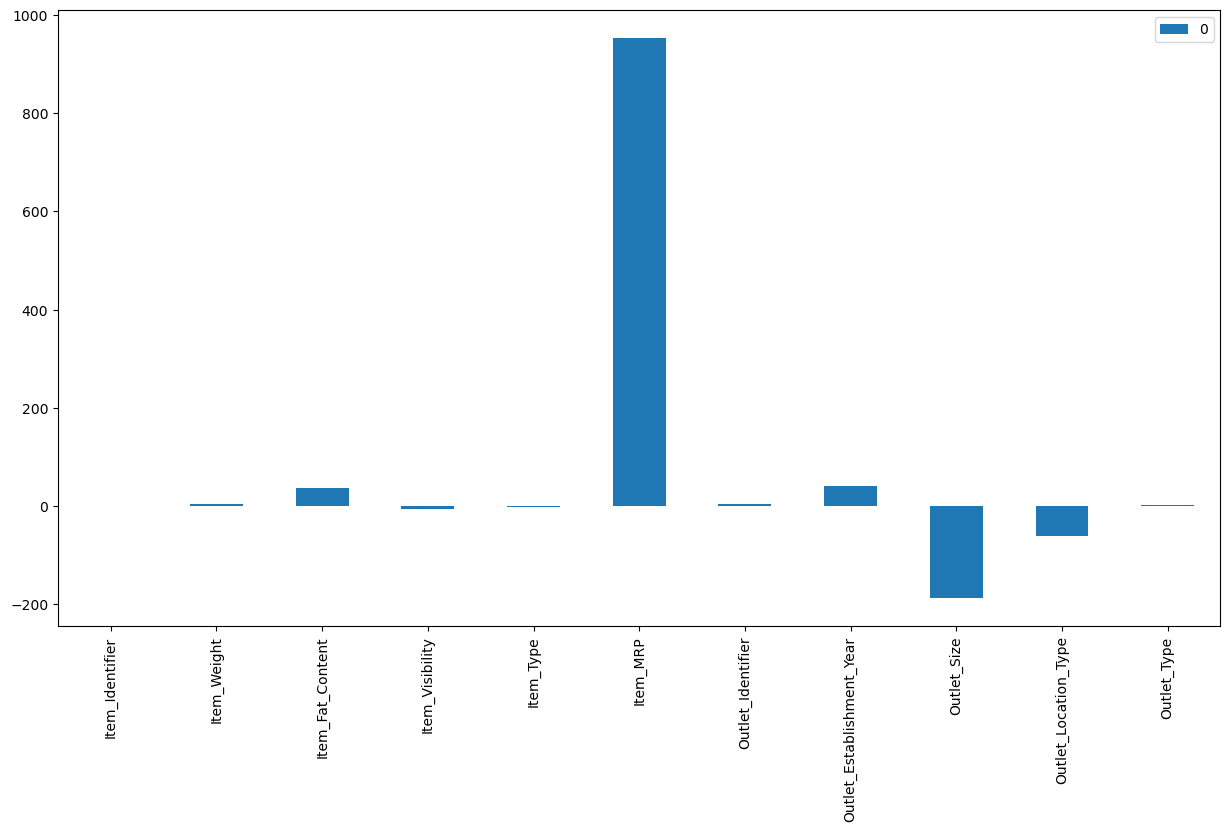

In [109]:
pd.DataFrame(ridge_1a.coef_,xtrain.columns).plot(kind='bar')

#### Lasso

In [110]:
lasso = Lasso(alpha = 0.01, max_iter = 500)
lasso.fit(xtrain, ytrain)

Lasso(alpha=0.01, max_iter=500)

In [111]:
# predict on train
pred_train_l = lasso.predict(xtrain)

# predict on test
pred_test_l  = lasso.predict(xtest)


print("RMSE Train :", np.sqrt(mean_squared_error(ytrain,
                                                 pred_train_l)))

print("RMSE Test  :", np.sqrt(mean_squared_error(ytest,
                                                 pred_test_l)))

RMSE Train : 1124.9634811573972
RMSE Test  : 1130.692017142272


In [112]:
# r2_score (actual, predicted)

r2_train = r2_score(ytrain, pred_train_l)
r2_test = r2_score(ytest, pred_test_l)

print("R2 Train :", r2_train)
print("R2 Test :", r2_test)

R2 Train : 0.5624306988528524
R2 Test : 0.5724381899707782


<Axes: >

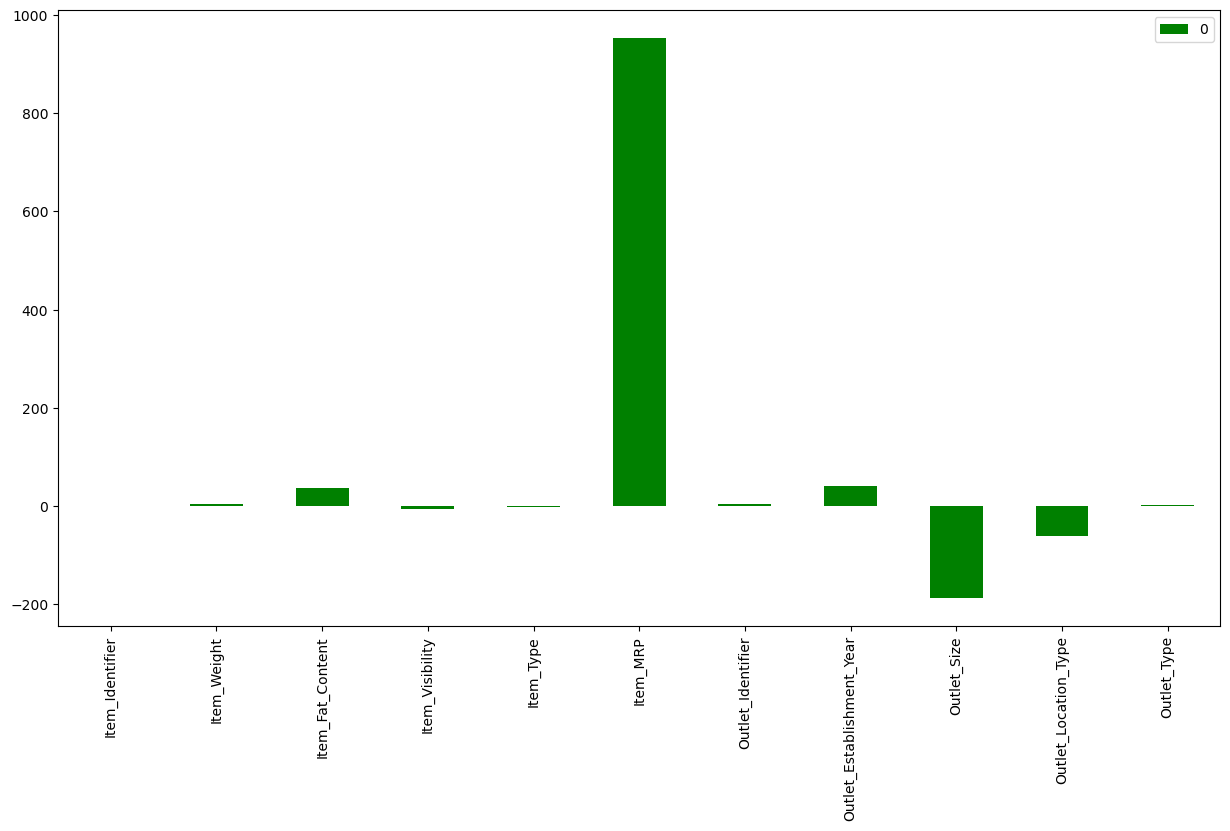

In [113]:
pd.DataFrame(lasso.coef_,xtrain.columns).plot(kind='bar', color='green')

#### Elastic net

In [114]:
enet = ElasticNet(alpha=0.1, l1_ratio=0.01, max_iter=500)

enet.fit(xtrain,ytrain)

ElasticNet(alpha=0.1, l1_ratio=0.01, max_iter=500)

In [115]:
# predict on train
pred_train_e = enet.predict(xtrain)

# predict on test
pred_test_e  = enet.predict(xtest)


print("RMSE Train :", np.sqrt(mean_squared_error(ytrain,
                                                 pred_train_e)))

print("RMSE Test  :", np.sqrt(mean_squared_error(ytest,
                                                 pred_test_e)))

RMSE Train : 1128.4506851487886
RMSE Test  : 1133.3809216592292


In [116]:
# r2_score (actual, predicted)

r2_train = r2_score(ytrain, pred_train_e)
r2_test = r2_score(ytest, pred_test_e)

print("R2 Train :", r2_train)
print("R2 Test :", r2_test)

R2 Train : 0.5597137067906484
R2 Test : 0.570402198053757


<Axes: >

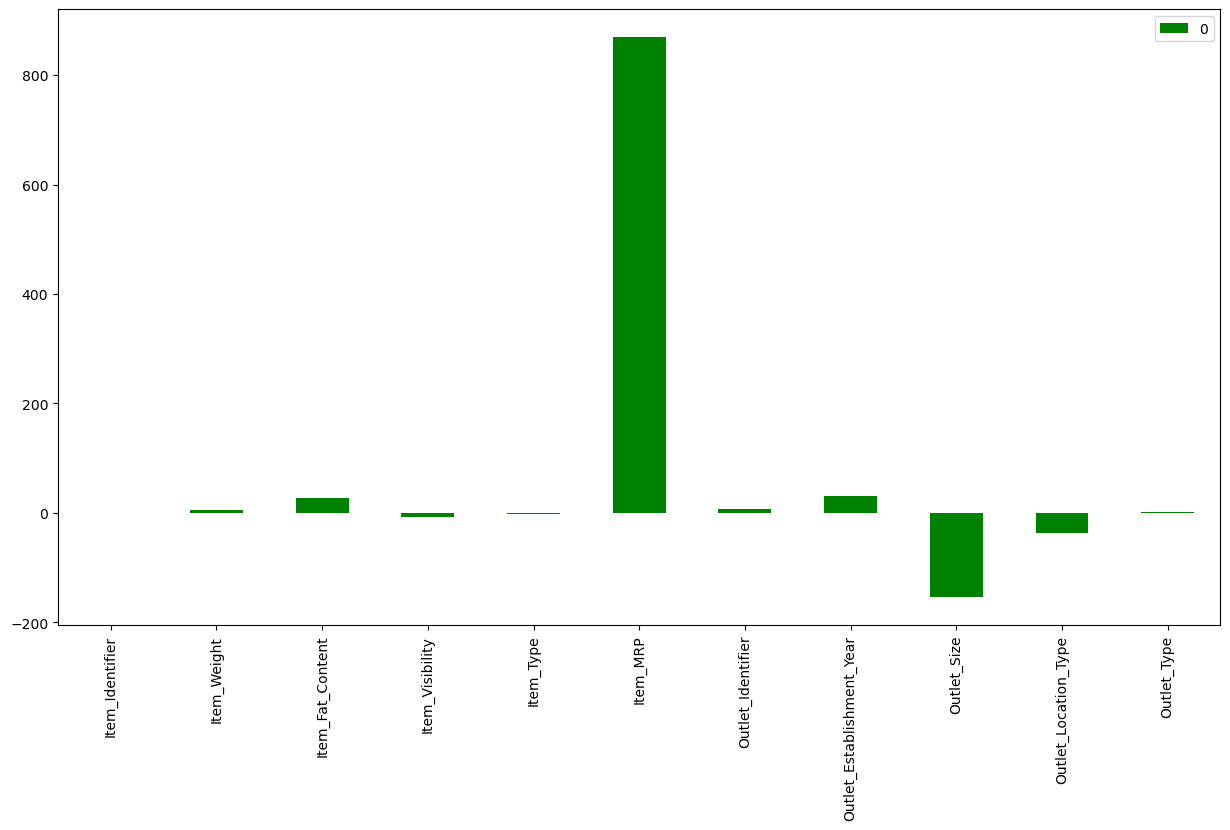

In [117]:
pd.DataFrame(enet.coef_,xtrain.columns).plot(kind='bar', color='green')

### Decision Tree Regressor

In [118]:
from sklearn.tree import DecisionTreeRegressor

dt=DecisionTreeRegressor(random_state=10)

In [119]:
dt.fit(xtrain, ytrain)
ypred_dt = dt.predict(xtest)

In [120]:
mse = mean_squared_error(ytest, ypred_dt)
rmse = math.sqrt(mse)

print("RMSE :", rmse)

RMSE : 1393.2024965149747


In [121]:
r2 = r2_score(ytest, ypred_dt)
print("R2 Score :", r2)

R2 Score : 0.350859444289528


##### Feature Importance - Decision Tree regressor

In [122]:
feature_df = pd.DataFrame()
feature_df['Feature'] = xtrain.columns
feature_df['Importances'] = dt.feature_importances_
feature_df = feature_df.sort_values(by='Importances', ascending=False)
feature_df

,Feature,Importances
5,Item_MRP,0.422236
10,Outlet_Type,0.198007
7,Outlet_Establishment_Year,0.085354
3,Item_Visibility,0.084427
0,Item_Identifier,0.072977
1,Item_Weight,0.050144
4,Item_Type,0.036704
6,Outlet_Identifier,0.019358
8,Outlet_Size,0.013565
2,Item_Fat_Content,0.008617


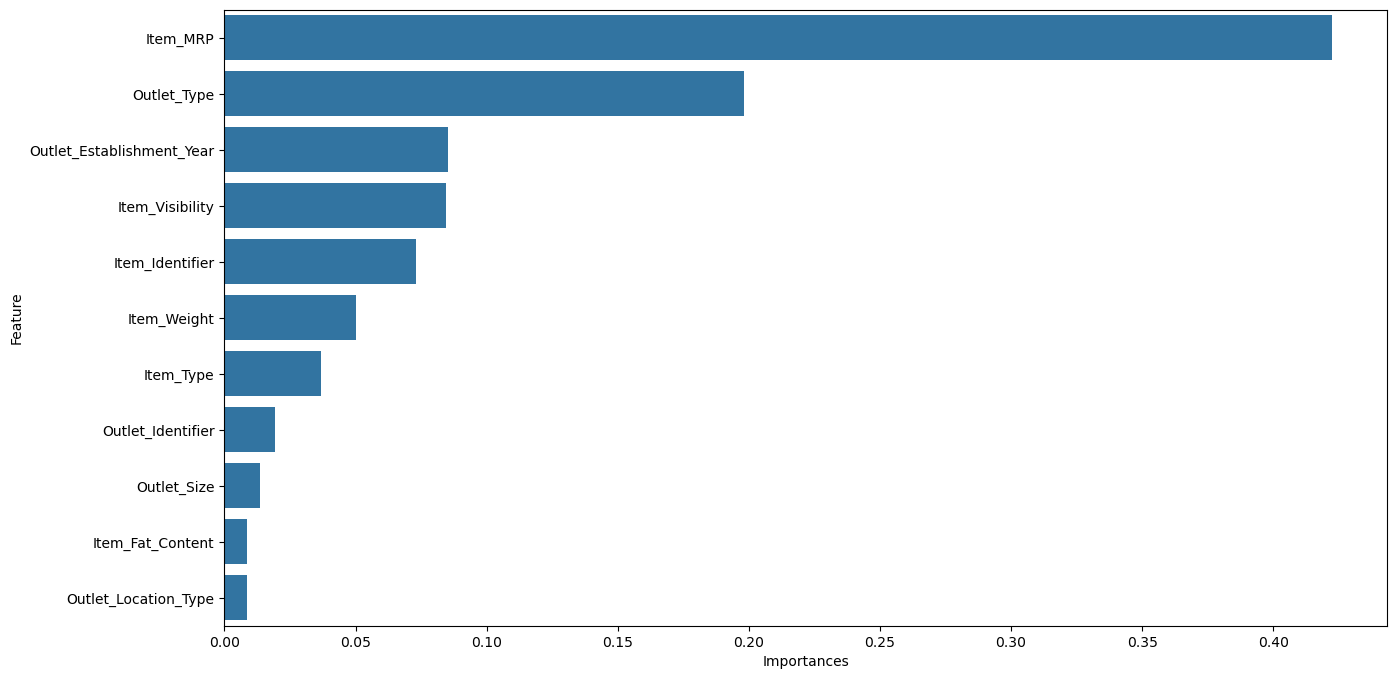

In [123]:
sns.barplot(x='Importances', y='Feature', data=feature_df)
plt.show()

### Decision Tree Regressor - Tunned

In [124]:
# Parameters to build the model on 
'''parameters = {
    'max_depth': [5, 10, 15, 20],  # Exploring various depths for flexibility and potential overfitting control
    'min_samples_split': [10, 20, 30],  # To ensure minimum samples for splits, improving stability
    'min_samples_leaf': [5, 10, 15],  # To manage leaves with enough samples for reducing overfitting
    'max_features': ['auto', 'sqrt', 'log2']  # To assess the optimal feature subset size
}

dt11 = DecisionTreeRegressor(random_state=10)'''

"parameters = {\n    'max_depth': [5, 10, 15, 20],  # Exploring various depths for flexibility and potential overfitting control\n    'min_samples_split': [10, 20, 30],  # To ensure minimum samples for splits, improving stability\n    'min_samples_leaf': [5, 10, 15],  # To manage leaves with enough samples for reducing overfitting\n    'max_features': ['auto', 'sqrt', 'log2']  # To assess the optimal feature subset size\n}\n\ndt11 = DecisionTreeRegressor(random_state=10)"

In [125]:
'''dtcv = GridSearchCV(dt11, parameters, cv=5, scoring="r2")
dtcv.fit(xtrain, ytrain)
print(dtcv.best_params_)
print(dtcv.best_score_)'''

'dtcv = GridSearchCV(dt11, parameters, cv=5, scoring="r2")\ndtcv.fit(xtrain, ytrain)\nprint(dtcv.best_params_)\nprint(dtcv.best_score_)'

In [126]:
dt1=DecisionTreeRegressor(max_depth = 10, max_features = 'sqrt', min_samples_leaf = 10, 
                          min_samples_split = 30, random_state=10)
dt1.fit(xtrain, ytrain)
ypred_dt1 = dt1.predict(xtest)

In [127]:
mse = mean_squared_error(ytest, ypred_dt1)
rmse = math.sqrt(mse)

print("RMSE :", rmse)

RMSE : 1115.9703233604432


In [128]:
r2 = r2_score(ytest, ypred_dt1)
print("R2 Score :", r2)

R2 Score : 0.5834994815455308


### Ensemble Learning - Bagging

### Random Forest Regressor

In [129]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(random_state=10)

In [130]:
rf.fit(xtrain, ytrain)
ypred_rf = rf.predict(xtest)

In [131]:
mse = mean_squared_error(ytest, ypred_rf)
rmse = math.sqrt(mse)

print("RMSE :", rmse)

RMSE : 1056.7780223036605


In [132]:
r2 = r2_score(ytest, ypred_rf)
print("R2 Score :", r2)

R2 Score : 0.626511012986738


##### Feature Importance - Random Forest regressor

In [133]:
feature_rf = pd.DataFrame()
feature_rf['Feature'] = xtrain.columns
feature_rf['Importances'] = rf.feature_importances_
feature_rf = feature_rf.sort_values(by='Importances', ascending=False)
feature_rf

,Feature,Importances
5,Item_MRP,0.423458
10,Outlet_Type,0.246028
3,Item_Visibility,0.080442
0,Item_Identifier,0.071165
1,Item_Weight,0.049939
7,Outlet_Establishment_Year,0.042500
4,Item_Type,0.037125
8,Outlet_Size,0.015893
6,Outlet_Identifier,0.015770
9,Outlet_Location_Type,0.009619


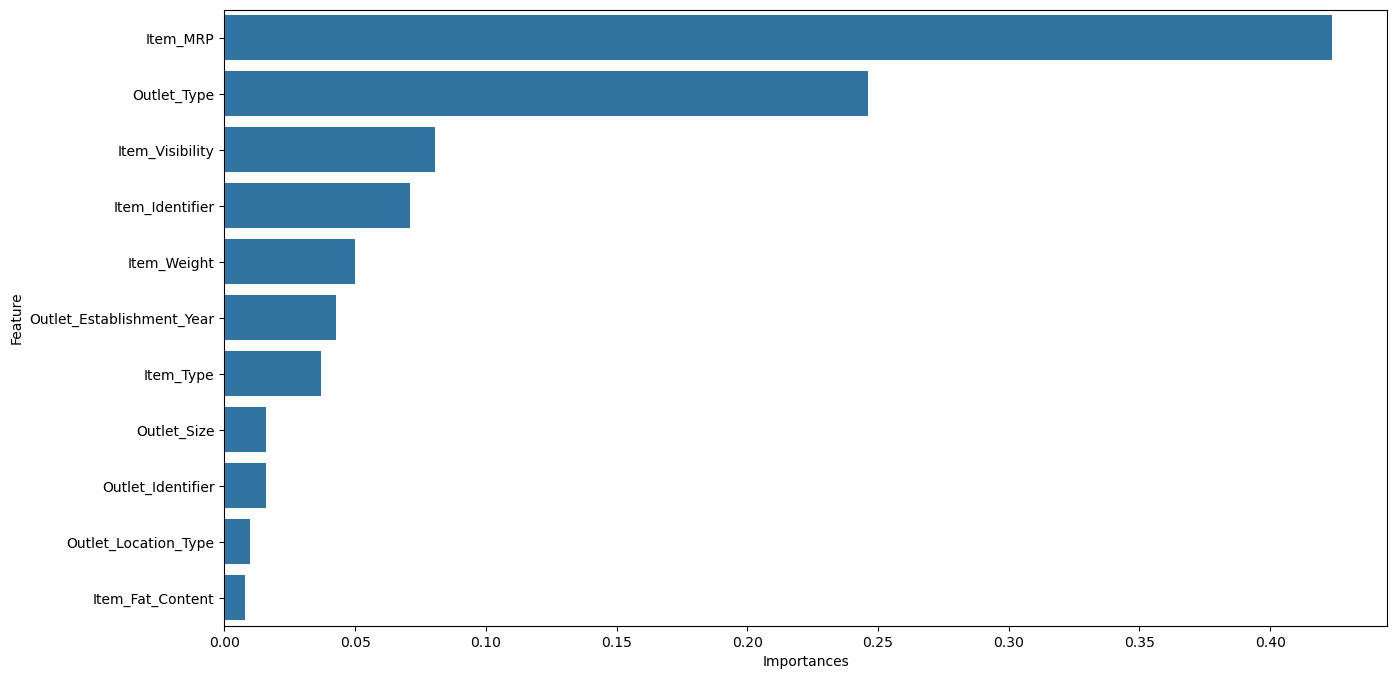

In [134]:
sns.barplot(x='Importances', y='Feature', data=feature_rf)
plt.show()

### Random Forest Regressor - Tunned

In [135]:
'''parameters = {
    'n_estimators': [50, 100, 200],  # A range to explore model complexity; higher values often improve stability
    'max_depth': [10, 15, 20, None],  # Deeper trees can capture more patterns but may overfit
    'min_samples_split': [2, 5, 10],  # Controls splits to ensure each split has sufficient data
    'min_samples_leaf': [1, 2, 4],  # Leaf nodes with enough samples reduce overfitting
    'max_features': ['sqrt', 'log2', None]  # Helps find the optimal subset size of features at each split
}'''

"parameters = {\n    'n_estimators': [50, 100, 200],  # A range to explore model complexity; higher values often improve stability\n    'max_depth': [10, 15, 20, None],  # Deeper trees can capture more patterns but may overfit\n    'min_samples_split': [2, 5, 10],  # Controls splits to ensure each split has sufficient data\n    'min_samples_leaf': [1, 2, 4],  # Leaf nodes with enough samples reduce overfitting\n    'max_features': ['sqrt', 'log2', None]  # Helps find the optimal subset size of features at each split\n}"

In [136]:
'''rf11 = RandomForestRegressor(random_state=10)

rfcv = GridSearchCV(rf11, parameters, cv=5, scoring="r2")
rfcv.fit(xtrain, ytrain)
print(rfcv.best_params_)
print(rfcv.best_score_)'''

'rf11 = RandomForestRegressor(random_state=10)\n\nrfcv = GridSearchCV(rf11, parameters, cv=5, scoring="r2")\nrfcv.fit(xtrain, ytrain)\nprint(rfcv.best_params_)\nprint(rfcv.best_score_)'

In [137]:
rf1=RandomForestRegressor(n_estimators = 200, max_depth = None, min_samples_split = 10, min_samples_leaf = 4,
                          max_features = 'sqrt', random_state=10)
rf1.fit(xtrain, ytrain)
ypred_rf1 = rf1.predict(xtest)

In [138]:
mse = mean_squared_error(ytest, ypred_rf1)
rmse = math.sqrt(mse)

print("RMSE :", rmse)

RMSE : 1019.6193845662234


In [139]:
r2 = r2_score(ytest, ypred_rf1)
print("R2 Score :", r2)

R2 Score : 0.65231462581297


### Bagging Regressor

In [140]:
from sklearn.ensemble import BaggingRegressor

br=BaggingRegressor(random_state=10)

In [141]:
br.fit(xtrain, ytrain)
ypred_br = br.predict(xtest)

In [142]:
mse = mean_squared_error(ytest, ypred_br)
rmse = math.sqrt(mse)

print("RMSE :", rmse)

RMSE : 1105.7502187893185


In [143]:
r2 = r2_score(ytest, ypred_br)
print("R2 Score :", r2)

R2 Score : 0.5910932093340913


### Bagging Regressor - Tunned

In [144]:
'''parameters = {
    'n_estimators': [10, 50, 100],  # Number of base estimators; higher values increase stability but require more computation
    'max_samples': [0.5, 0.7, 1.0],  # Proportion of samples drawn for each base estimator; values <1.0 apply subsampling
    'max_features': [0.5, 0.7, 1.0],  # Proportion of features to consider; values <1.0 apply feature sampling
    'bootstrap': [True, False],  # Whether to bootstrap samples; "True" uses replacement, "False" uses subsampling without replacement
    'bootstrap_features': [True, False]  # Whether to bootstrap features
}'''

'parameters = {\n    \'n_estimators\': [10, 50, 100],  # Number of base estimators; higher values increase stability but require more computation\n    \'max_samples\': [0.5, 0.7, 1.0],  # Proportion of samples drawn for each base estimator; values <1.0 apply subsampling\n    \'max_features\': [0.5, 0.7, 1.0],  # Proportion of features to consider; values <1.0 apply feature sampling\n    \'bootstrap\': [True, False],  # Whether to bootstrap samples; "True" uses replacement, "False" uses subsampling without replacement\n    \'bootstrap_features\': [True, False]  # Whether to bootstrap features\n}'

In [145]:
'''br11 = BaggingRegressor(random_state=10)

brcv = GridSearchCV(br11, parameters, cv=5, scoring="r2")
brcv.fit(xtrain, ytrain)
print(brcv.best_params_)
print(brcv.best_score_)'''

'br11 = BaggingRegressor(random_state=10)\n\nbrcv = GridSearchCV(br11, parameters, cv=5, scoring="r2")\nbrcv.fit(xtrain, ytrain)\nprint(brcv.best_params_)\nprint(brcv.best_score_)'

In [146]:
br1=BaggingRegressor(n_estimators = 100,max_samples = 0.5,max_features = 1.0,bootstrap = False,bootstrap_features = False,
                     random_state=10)
br1.fit(xtrain, ytrain)
ypred_br1 = br1.predict(xtest)

In [147]:
mse = mean_squared_error(ytest, ypred_br1)
rmse = math.sqrt(mse)

print("RMSE :", rmse)

RMSE : 1048.997182250585


In [148]:
r2 = r2_score(ytest, ypred_br1)
print("R2 Score :", r2)

R2 Score : 0.6319906116410599


### Ensemble Learning - Boosting

### Adaboost Regressor

In [149]:
from sklearn.ensemble import AdaBoostRegressor

abr=AdaBoostRegressor(random_state=10)

In [150]:
abr.fit(xtrain, ytrain)
ypred_abr = abr.predict(xtest)

In [151]:
mse = mean_squared_error(ytest, ypred_abr)
rmse = math.sqrt(mse)

print("RMSE :", rmse)

RMSE : 1142.4730335735244


In [152]:
r2 = r2_score(ytest, ypred_abr)
print("R2 Score :", r2)

R2 Score : 0.5634819857695893


### Adaboost Regressor - Tunned

In [153]:
'''parameters = {
    'n_estimators': [50, 100, 200],  # Number of boosting rounds; more estimators generally improve accuracy up to a point
    'learning_rate': [0.01, 0.1, 0.5, 1.0],  # Controls contribution of each regressor; lower values increase stability
    'loss': ['linear', 'square', 'exponential']  # Different loss functions to explore impact on performance
}'''

"parameters = {\n    'n_estimators': [50, 100, 200],  # Number of boosting rounds; more estimators generally improve accuracy up to a point\n    'learning_rate': [0.01, 0.1, 0.5, 1.0],  # Controls contribution of each regressor; lower values increase stability\n    'loss': ['linear', 'square', 'exponential']  # Different loss functions to explore impact on performance\n}"

In [154]:
'''abr11=AdaBoostRegressor(random_state=10)

abrcv = GridSearchCV(abr11, parameters, cv=5, scoring="r2")
abrcv.fit(xtrain, ytrain)
print(abrcv.best_params_)
print(abrcv.best_score_)'''

'abr11=AdaBoostRegressor(random_state=10)\n\nabrcv = GridSearchCV(abr11, parameters, cv=5, scoring="r2")\nabrcv.fit(xtrain, ytrain)\nprint(abrcv.best_params_)\nprint(abrcv.best_score_)'

In [155]:
abr1=AdaBoostRegressor(n_estimators = 50,learning_rate = 0.1,loss = 'linear',random_state=10)
abr1.fit(xtrain, ytrain)
ypred_abr1 = abr1.predict(xtest)

In [156]:
mse = mean_squared_error(ytest, ypred_abr1)
rmse = math.sqrt(mse)

print("RMSE :", rmse)

RMSE : 1114.6859066734003


In [157]:
r2 = r2_score(ytest, ypred_abr1)
print("R2 Score :", r2)

R2 Score : 0.5844576653805045


### Gradient Boosting Regressor

In [158]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(random_state=10)

In [159]:
gbr.fit(xtrain, ytrain)
ypred_gbr = gbr.predict(xtest)

In [160]:
mse = mean_squared_error(ytest, ypred_gbr)
rmse = math.sqrt(mse)

print("RMSE :", rmse)

RMSE : 1030.912722832561


In [161]:
r2 = r2_score(ytest, ypred_gbr)
print("R2 Score :", r2)

R2 Score : 0.6445700227166157


### Gradient Boosting Regressor - Tunned

In [162]:
'''parameters = {
    'n_estimators': [50, 100, 200],          # Number of boosting stages; higher values can improve accuracy at a cost of computation time
    'learning_rate': [0.01, 0.1, 0.2],       # Shrinks contribution of each tree; lower values improve stability but require more estimators
    'max_depth': [3, 5, 7],                  # Limits tree depth to control overfitting
    'min_samples_split': [2, 5, 10],         # Minimum samples to split a node; higher values can prevent overfitting
    'min_samples_leaf': [1, 2, 4],           # Minimum samples in each leaf; higher values can smooth model
    'subsample': [0.8, 1.0]                  # Fraction of samples for training each tree; values <1.0 introduce randomness
}'''

"parameters = {\n    'n_estimators': [50, 100, 200],          # Number of boosting stages; higher values can improve accuracy at a cost of computation time\n    'learning_rate': [0.01, 0.1, 0.2],       # Shrinks contribution of each tree; lower values improve stability but require more estimators\n    'max_depth': [3, 5, 7],                  # Limits tree depth to control overfitting\n    'min_samples_split': [2, 5, 10],         # Minimum samples to split a node; higher values can prevent overfitting\n    'min_samples_leaf': [1, 2, 4],           # Minimum samples in each leaf; higher values can smooth model\n    'subsample': [0.8, 1.0]                  # Fraction of samples for training each tree; values <1.0 introduce randomness\n}"

In [163]:
'''gbr11=GradientBoostingRegressor(random_state=10)

gbrcv = GridSearchCV(gbr11, parameters, cv=5, scoring="r2")
gbrcv.fit(xtrain, ytrain)
print(gbrcv.best_params_)
print(gbrcv.best_score_)'''

'gbr11=GradientBoostingRegressor(random_state=10)\n\ngbrcv = GridSearchCV(gbr11, parameters, cv=5, scoring="r2")\ngbrcv.fit(xtrain, ytrain)\nprint(gbrcv.best_params_)\nprint(gbrcv.best_score_)'

In [164]:
gbr1 = GradientBoostingRegressor(n_estimators = 50,learning_rate = 0.1,max_depth = 5,min_samples_split = 2,
                                min_samples_leaf = 4,subsample = 1.0,random_state=10)
gbr1.fit(xtrain, ytrain)
ypred_gbr1 = gbr1.predict(xtest)

In [165]:
mse = mean_squared_error(ytest, ypred_gbr1)
rmse = math.sqrt(mse)

print("RMSE :", rmse)

RMSE : 1020.8805264964192


In [166]:
r2 = r2_score(ytest, ypred_gbr1)
print("R2 Score :", r2)

R2 Score : 0.6514540070694728


### XGBoost Regressor

In [167]:
from xgboost import XGBRegressor

xgb = XGBRegressor(random_state=10)

In [168]:
xgb.fit(xtrain, ytrain)
ypred_xgb = xgb.predict(xtest)

In [169]:
mse = mean_squared_error(ytest, ypred_xgb)
rmse = math.sqrt(mse)

print("RMSE :", rmse)

RMSE : 1086.473899678618


In [170]:
r2 = r2_score(ytest, ypred_xgb)
print("R2 Score :", r2)

R2 Score : 0.605225719731693


### XG Boost Regressor - Tunned

In [171]:
'''parameters = {
    'n_estimators': [50, 100, 200],           # Number of boosting rounds; higher values improve accuracy but increase training time
    'learning_rate': [0.01, 0.1, 0.2],        # Shrinks contribution of each tree; lower values increase stability
    'max_depth': [3, 5, 7],                   # Controls tree depth, balancing model complexity
    'min_child_weight': [1, 3, 5],            # Minimum sum of instance weight needed in a child; helps prevent overfitting
    'subsample': [0.8, 1.0],                  # Fraction of samples per tree; values <1.0 add randomness
    'colsample_bytree': [0.8, 1.0],           # Fraction of features used for each tree; values <1.0 improve generalization
    'gamma': [0, 0.1, 0.2]                    # Minimum loss reduction for node splitting; higher values make model more conservative
}'''

"parameters = {\n    'n_estimators': [50, 100, 200],           # Number of boosting rounds; higher values improve accuracy but increase training time\n    'learning_rate': [0.01, 0.1, 0.2],        # Shrinks contribution of each tree; lower values increase stability\n    'max_depth': [3, 5, 7],                   # Controls tree depth, balancing model complexity\n    'min_child_weight': [1, 3, 5],            # Minimum sum of instance weight needed in a child; helps prevent overfitting\n    'subsample': [0.8, 1.0],                  # Fraction of samples per tree; values <1.0 add randomness\n    'colsample_bytree': [0.8, 1.0],           # Fraction of features used for each tree; values <1.0 improve generalization\n    'gamma': [0, 0.1, 0.2]                    # Minimum loss reduction for node splitting; higher values make model more conservative\n}"

In [172]:
'''xgb11=XGBRegressor(random_state=10)

xgbcv = GridSearchCV(xgb11, parameters, cv=5, scoring="r2")
xgbcv.fit(xtrain, ytrain)
print(xgbcv.best_params_)
print(xgbcv.best_score_)'''

'xgb11=XGBRegressor(random_state=10)\n\nxgbcv = GridSearchCV(xgb11, parameters, cv=5, scoring="r2")\nxgbcv.fit(xtrain, ytrain)\nprint(xgbcv.best_params_)\nprint(xgbcv.best_score_)'

In [173]:
xgb1 = XGBRegressor(n_estimators = 50,learning_rate = 0.1,max_depth = 5,min_child_weight = 5,
                    subsample = 1.0,colsample_bytree = 1.0,gamma = 0,random_state=10)
xgb1.fit(xtrain, ytrain)
ypred_xgb1 = xgb1.predict(xtest)

In [174]:
mse = mean_squared_error(ytest, ypred_xgb1)
rmse = math.sqrt(mse)

print("RMSE :", rmse)

RMSE : 1016.1719800618052


In [175]:
r2 = r2_score(ytest, ypred_xgb1)
print("R2 Score :", r2)

R2 Score : 0.654661748371566


In [176]:
## Optimised code

perf_score = pd.DataFrame(columns=['Model', 'Alpha', 'L1_Ratio','R2_Train','R2_Test','RMSE Train','RMSE TEST','MAPE' ] )

In [177]:
def per_measures(model):

   #-----------------------------------------------#
   # Calculation of R square and Adj R2            #
   #-----------------------------------------------#

   # calculate rsquare value

    rsq_train = model.score(xtrain, ytrain)
    rsq_test  = model.score(xtest, ytest)

    # calculating adjusted rsquare value
    n =xtrain.shape[0]
    k = xtrain.shape[1]
    rsq_adj = 1 - ((1-rsq_test)*(n-1)/(n-k-1))


   #-----------------------------------------------#
   # Model getting trained                         #
   #-----------------------------------------------#

    model.fit(xtrain,ytrain)

    pred_train = model.predict(xtrain)
    pred_test = model.predict(xtest)

   #-----------------------------------------------#
   # Calculation of RMSE and MAPE                  #
   #-----------------------------------------------#

    rmse_train =np.sqrt(mean_squared_error(ytrain,pred_train))
    rmse_test  =np.sqrt(mean_squared_error(ytest,pred_test))


    MAPE_test = (np.mean(np.abs((ytest - pred_test) / ytest)) * 100)


    return (rsq_train,rsq_test,rmse_train,rmse_test,MAPE_test)

In [178]:
def update_performance (name, model, alpha = '-', l1_ratio = '-' ):


    # assign 'comp_perf' as global variable
    global perf_score


    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    perf_score = pd.concat([perf_score,
                            pd.DataFrame({ 'Model'          : [name],
                                          'Alpha'          : [alpha],
                                          'L1_Ratio'       : [l1_ratio],
                                          'R2_Train'       : [per_measures(model)[0]],
                                          'R2_Test'        : [per_measures(model)[1]],
                                          'RMSE Train'     : [per_measures(model)[2]],
                                          'RMSE TEST'      : [per_measures(model)[3]],
                                          'MAPE'           : [per_measures(model)[4]]
                                          })],
                                          ignore_index = True)

In [179]:
update_performance(name = 'Linear Regression', model = linear)

perf_score

,Model,Alpha,L1_Ratio,R2_Train,R2_Test,RMSE Train,RMSE TEST,MAPE
0,Linear Regression,-,-,0.562431,0.572438,1124.96348,1130.692396,110.928081


In [180]:
update_performance(name='Ridge', model = ridge_1a, alpha = 0.01)

perf_score

,Model,Alpha,L1_Ratio,R2_Train,R2_Test,RMSE Train,RMSE TEST,MAPE
0,Linear Regression,-,-,0.562431,0.572438,1124.96348,1130.692396,110.928081
1,Ridge,0.01,-,0.562431,0.572439,1124.96349,1130.691002,110.918771


In [181]:
update_performance(name = 'Lasso', model = lasso, alpha=0.01)

perf_score

,Model,Alpha,L1_Ratio,R2_Train,R2_Test,RMSE Train,RMSE TEST,MAPE
0,Linear Regression,-,-,0.562431,0.572438,1124.963480,1130.692396,110.928081
1,Ridge,0.01,-,0.562431,0.572439,1124.963490,1130.691002,110.918771
2,Lasso,0.01,-,0.562431,0.572438,1124.963481,1130.692017,110.926861


In [182]:
update_performance(name='ElasticNet', model=enet, alpha=0.1, l1_ratio=0.01)

perf_score

,Model,Alpha,L1_Ratio,R2_Train,R2_Test,RMSE Train,RMSE TEST,MAPE
0,Linear Regression,-,-,0.562431,0.572438,1124.963480,1130.692396,110.928081
1,Ridge,0.01,-,0.562431,0.572439,1124.963490,1130.691002,110.918771
2,Lasso,0.01,-,0.562431,0.572438,1124.963481,1130.692017,110.926861
3,ElasticNet,0.1,0.01,0.559714,0.570402,1128.450685,1133.380922,105.788219


In [183]:
update_performance(name='Decision Tree regressor', model=dt)

perf_score

,Model,Alpha,L1_Ratio,R2_Train,R2_Test,RMSE Train,RMSE TEST,MAPE
0,Linear Regression,-,-,0.562431,0.572438,1.124963e+03,1130.692396,110.928081
1,Ridge,0.01,-,0.562431,0.572439,1.124963e+03,1130.691002,110.918771
2,Lasso,0.01,-,0.562431,0.572438,1.124963e+03,1130.692017,110.926861
3,ElasticNet,0.1,0.01,0.559714,0.570402,1.128451e+03,1133.380922,105.788219
4,Decision Tree regressor,-,-,1.000000,0.350859,4.769494e-15,1393.202497,63.899716


In [184]:
update_performance(name='Decision Tree Regressor - Tunned', model=dt1)

perf_score

,Model,Alpha,L1_Ratio,R2_Train,R2_Test,RMSE Train,RMSE TEST,MAPE
0,Linear Regression,-,-,0.562431,0.572438,1.124963e+03,1130.692396,110.928081
1,Ridge,0.01,-,0.562431,0.572439,1.124963e+03,1130.691002,110.918771
2,Lasso,0.01,-,0.562431,0.572438,1.124963e+03,1130.692017,110.926861
3,ElasticNet,0.1,0.01,0.559714,0.570402,1.128451e+03,1133.380922,105.788219
4,Decision Tree regressor,-,-,1.000000,0.350859,4.769494e-15,1393.202497,63.899716
5,Decision Tree Regressor - Tunned,-,-,0.632462,0.583499,1.031017e+03,1115.970323,54.770163


In [185]:
update_performance(name='Random Forest regressor', model=rf)

perf_score

,Model,Alpha,L1_Ratio,R2_Train,R2_Test,RMSE Train,RMSE TEST,MAPE
0,Linear Regression,-,-,0.562431,0.572438,1.124963e+03,1130.692396,110.928081
1,Ridge,0.01,-,0.562431,0.572439,1.124963e+03,1130.691002,110.918771
2,Lasso,0.01,-,0.562431,0.572438,1.124963e+03,1130.692017,110.926861
3,ElasticNet,0.1,0.01,0.559714,0.570402,1.128451e+03,1133.380922,105.788219
4,Decision Tree regressor,-,-,1.000000,0.350859,4.769494e-15,1393.202497,63.899716
5,Decision Tree Regressor - Tunned,-,-,0.632462,0.583499,1.031017e+03,1115.970323,54.770163
6,Random Forest regressor,-,-,0.945319,0.626511,3.976795e+02,1056.778022,50.753729


In [186]:
update_performance(name='Random Forest Regressor - Tunned', model=rf1)

perf_score

,Model,Alpha,L1_Ratio,R2_Train,R2_Test,RMSE Train,RMSE TEST,MAPE
0,Linear Regression,-,-,0.562431,0.572438,1.124963e+03,1130.692396,110.928081
1,Ridge,0.01,-,0.562431,0.572439,1.124963e+03,1130.691002,110.918771
2,Lasso,0.01,-,0.562431,0.572438,1.124963e+03,1130.692017,110.926861
3,ElasticNet,0.1,0.01,0.559714,0.570402,1.128451e+03,1133.380922,105.788219
4,Decision Tree regressor,-,-,1.000000,0.350859,4.769494e-15,1393.202497,63.899716
5,Decision Tree Regressor - Tunned,-,-,0.632462,0.583499,1.031017e+03,1115.970323,54.770163
6,Random Forest regressor,-,-,0.945319,0.626511,3.976795e+02,1056.778022,50.753729
7,Random Forest Regressor - Tunned,-,-,0.791587,0.652315,7.763861e+02,1019.619385,51.025902


In [187]:
update_performance(name='Bagging regressor', model=br)

perf_score

,Model,Alpha,L1_Ratio,R2_Train,R2_Test,RMSE Train,RMSE TEST,MAPE
0,Linear Regression,-,-,0.562431,0.572438,1.124963e+03,1130.692396,110.928081
1,Ridge,0.01,-,0.562431,0.572439,1.124963e+03,1130.691002,110.918771
2,Lasso,0.01,-,0.562431,0.572438,1.124963e+03,1130.692017,110.926861
3,ElasticNet,0.1,0.01,0.559714,0.570402,1.128451e+03,1133.380922,105.788219
4,Decision Tree regressor,-,-,1.000000,0.350859,4.769494e-15,1393.202497,63.899716
5,Decision Tree Regressor - Tunned,-,-,0.632462,0.583499,1.031017e+03,1115.970323,54.770163
6,Random Forest regressor,-,-,0.945319,0.626511,3.976795e+02,1056.778022,50.753729
7,Random Forest Regressor - Tunned,-,-,0.791587,0.652315,7.763861e+02,1019.619385,51.025902
8,Bagging regressor,-,-,0.926491,0.591093,4.610891e+02,1105.750219,51.738767


In [188]:
update_performance(name='Bagging Regressor - Tunned', model=br1)

perf_score

,Model,Alpha,L1_Ratio,R2_Train,R2_Test,RMSE Train,RMSE TEST,MAPE
0,Linear Regression,-,-,0.562431,0.572438,1.124963e+03,1130.692396,110.928081
1,Ridge,0.01,-,0.562431,0.572439,1.124963e+03,1130.691002,110.918771
2,Lasso,0.01,-,0.562431,0.572438,1.124963e+03,1130.692017,110.926861
3,ElasticNet,0.1,0.01,0.559714,0.570402,1.128451e+03,1133.380922,105.788219
4,Decision Tree regressor,-,-,1.000000,0.350859,4.769494e-15,1393.202497,63.899716
5,Decision Tree Regressor - Tunned,-,-,0.632462,0.583499,1.031017e+03,1115.970323,54.770163
6,Random Forest regressor,-,-,0.945319,0.626511,3.976795e+02,1056.778022,50.753729
7,Random Forest Regressor - Tunned,-,-,0.791587,0.652315,7.763861e+02,1019.619385,51.025902
8,Bagging regressor,-,-,0.926491,0.591093,4.610891e+02,1105.750219,51.738767
9,Bagging Regressor - Tunned,-,-,0.900747,0.631991,5.357798e+02,1048.997182,50.728850


In [189]:
update_performance(name='Ada Boost regressor', model=abr)

perf_score

,Model,Alpha,L1_Ratio,R2_Train,R2_Test,RMSE Train,RMSE TEST,MAPE
0,Linear Regression,-,-,0.562431,0.572438,1.124963e+03,1130.692396,110.928081
1,Ridge,0.01,-,0.562431,0.572439,1.124963e+03,1130.691002,110.918771
2,Lasso,0.01,-,0.562431,0.572438,1.124963e+03,1130.692017,110.926861
3,ElasticNet,0.1,0.01,0.559714,0.570402,1.128451e+03,1133.380922,105.788219
4,Decision Tree regressor,-,-,1.000000,0.350859,4.769494e-15,1393.202497,63.899716
5,Decision Tree Regressor - Tunned,-,-,0.632462,0.583499,1.031017e+03,1115.970323,54.770163
6,Random Forest regressor,-,-,0.945319,0.626511,3.976795e+02,1056.778022,50.753729
7,Random Forest Regressor - Tunned,-,-,0.791587,0.652315,7.763861e+02,1019.619385,51.025902
8,Bagging regressor,-,-,0.926491,0.591093,4.610891e+02,1105.750219,51.738767
9,Bagging Regressor - Tunned,-,-,0.900747,0.631991,5.357798e+02,1048.997182,50.728850


In [190]:
update_performance(name='Ada Boost Regressor - Tunned', model=abr1)

perf_score

,Model,Alpha,L1_Ratio,R2_Train,R2_Test,RMSE Train,RMSE TEST,MAPE
0,Linear Regression,-,-,0.562431,0.572438,1.124963e+03,1130.692396,110.928081
1,Ridge,0.01,-,0.562431,0.572439,1.124963e+03,1130.691002,110.918771
2,Lasso,0.01,-,0.562431,0.572438,1.124963e+03,1130.692017,110.926861
3,ElasticNet,0.1,0.01,0.559714,0.570402,1.128451e+03,1133.380922,105.788219
4,Decision Tree regressor,-,-,1.000000,0.350859,4.769494e-15,1393.202497,63.899716
5,Decision Tree Regressor - Tunned,-,-,0.632462,0.583499,1.031017e+03,1115.970323,54.770163
6,Random Forest regressor,-,-,0.945319,0.626511,3.976795e+02,1056.778022,50.753729
7,Random Forest Regressor - Tunned,-,-,0.791587,0.652315,7.763861e+02,1019.619385,51.025902
8,Bagging regressor,-,-,0.926491,0.591093,4.610891e+02,1105.750219,51.738767
9,Bagging Regressor - Tunned,-,-,0.900747,0.631991,5.357798e+02,1048.997182,50.728850


In [191]:
update_performance(name='Gradient Boosting regressor', model=gbr)

perf_score

,Model,Alpha,L1_Ratio,R2_Train,R2_Test,RMSE Train,RMSE TEST,MAPE
0,Linear Regression,-,-,0.562431,0.572438,1.124963e+03,1130.692396,110.928081
1,Ridge,0.01,-,0.562431,0.572439,1.124963e+03,1130.691002,110.918771
2,Lasso,0.01,-,0.562431,0.572438,1.124963e+03,1130.692017,110.926861
3,ElasticNet,0.1,0.01,0.559714,0.570402,1.128451e+03,1133.380922,105.788219
4,Decision Tree regressor,-,-,1.000000,0.350859,4.769494e-15,1393.202497,63.899716
5,Decision Tree Regressor - Tunned,-,-,0.632462,0.583499,1.031017e+03,1115.970323,54.770163
6,Random Forest regressor,-,-,0.945319,0.626511,3.976795e+02,1056.778022,50.753729
7,Random Forest Regressor - Tunned,-,-,0.791587,0.652315,7.763861e+02,1019.619385,51.025902
8,Bagging regressor,-,-,0.926491,0.591093,4.610891e+02,1105.750219,51.738767
9,Bagging Regressor - Tunned,-,-,0.900747,0.631991,5.357798e+02,1048.997182,50.728850


In [192]:
update_performance(name='Gradient Boosting Regressor - Tunned', model=gbr1)

perf_score

,Model,Alpha,L1_Ratio,R2_Train,R2_Test,RMSE Train,RMSE TEST,MAPE
0,Linear Regression,-,-,0.562431,0.572438,1.124963e+03,1130.692396,110.928081
1,Ridge,0.01,-,0.562431,0.572439,1.124963e+03,1130.691002,110.918771
2,Lasso,0.01,-,0.562431,0.572438,1.124963e+03,1130.692017,110.926861
3,ElasticNet,0.1,0.01,0.559714,0.570402,1.128451e+03,1133.380922,105.788219
4,Decision Tree regressor,-,-,1.000000,0.350859,4.769494e-15,1393.202497,63.899716
5,Decision Tree Regressor - Tunned,-,-,0.632462,0.583499,1.031017e+03,1115.970323,54.770163
6,Random Forest regressor,-,-,0.945319,0.626511,3.976795e+02,1056.778022,50.753729
7,Random Forest Regressor - Tunned,-,-,0.791587,0.652315,7.763861e+02,1019.619385,51.025902
8,Bagging regressor,-,-,0.926491,0.591093,4.610891e+02,1105.750219,51.738767
9,Bagging Regressor - Tunned,-,-,0.900747,0.631991,5.357798e+02,1048.997182,50.728850


In [193]:
update_performance(name='XG boost regressor', model=xgb)

perf_score

,Model,Alpha,L1_Ratio,R2_Train,R2_Test,RMSE Train,RMSE TEST,MAPE
0,Linear Regression,-,-,0.562431,0.572438,1.124963e+03,1130.692396,110.928081
1,Ridge,0.01,-,0.562431,0.572439,1.124963e+03,1130.691002,110.918771
2,Lasso,0.01,-,0.562431,0.572438,1.124963e+03,1130.692017,110.926861
3,ElasticNet,0.1,0.01,0.559714,0.570402,1.128451e+03,1133.380922,105.788219
4,Decision Tree regressor,-,-,1.000000,0.350859,4.769494e-15,1393.202497,63.899716
5,Decision Tree Regressor - Tunned,-,-,0.632462,0.583499,1.031017e+03,1115.970323,54.770163
6,Random Forest regressor,-,-,0.945319,0.626511,3.976795e+02,1056.778022,50.753729
7,Random Forest Regressor - Tunned,-,-,0.791587,0.652315,7.763861e+02,1019.619385,51.025902
8,Bagging regressor,-,-,0.926491,0.591093,4.610891e+02,1105.750219,51.738767
9,Bagging Regressor - Tunned,-,-,0.900747,0.631991,5.357798e+02,1048.997182,50.728850


In [194]:
update_performance(name='XGBoost Regressor - Tunned', model=xgb1)

perf_score

,Model,Alpha,L1_Ratio,R2_Train,R2_Test,RMSE Train,RMSE TEST,MAPE
0,Linear Regression,-,-,0.562431,0.572438,1.124963e+03,1130.692396,110.928081
1,Ridge,0.01,-,0.562431,0.572439,1.124963e+03,1130.691002,110.918771
2,Lasso,0.01,-,0.562431,0.572438,1.124963e+03,1130.692017,110.926861
3,ElasticNet,0.1,0.01,0.559714,0.570402,1.128451e+03,1133.380922,105.788219
4,Decision Tree regressor,-,-,1.000000,0.350859,4.769494e-15,1393.202497,63.899716
5,Decision Tree Regressor - Tunned,-,-,0.632462,0.583499,1.031017e+03,1115.970323,54.770163
6,Random Forest regressor,-,-,0.945319,0.626511,3.976795e+02,1056.778022,50.753729
7,Random Forest Regressor - Tunned,-,-,0.791587,0.652315,7.763861e+02,1019.619385,51.025902
8,Bagging regressor,-,-,0.926491,0.591093,4.610891e+02,1105.750219,51.738767
9,Bagging Regressor - Tunned,-,-,0.900747,0.631991,5.357798e+02,1048.997182,50.728850


**Analysis of the Dataset Using Regression Models for Big Mart Sales Prediction**

* Model Performance Overview: 
The evaluation of various regression models for predicting sales at Big Mart indicates that the tuned versions of Random Forest, Gradient Boosting, and XGBoost Regressors are the top performers. Notably, the tuned XGBoost Regressor achieved an R² score of 65.47% on the test set, with an RMSE of 1016.17 and a MAPE of 50.51%. These metrics suggest that the model effectively captures the underlying patterns of the target variable, although there remains potential for further enhancement.

* Error Metrics: 
The Root Mean Square Error (RMSE) and Mean Absolute Percentage Error (MAPE) for each model provide insights into prediction accuracy. The tuned Gradient Boosting, Random Forest, and XGBoost regressors show the lowest RMSE values on the test set, indicating high prediction accuracy. The tuned Random Forest recorded an RMSE of 1019.62, while the tuned Gradient Boosting reached 1020.88, both closely aligned with the performance of the XGBoost model.

* Overfitting Insights: 
The Decision Tree Regressor displayed an R² score of 100% on the training set but plummeted to 35.08% on the test set, indicating severe overfitting. This significant disparity illustrates the model’s limited ability to generalize to unseen data, highlighting the necessity for more robust ensemble models like Random Forest, Bagging, and Boosting regressors, which better balance complexity and generalization.

* Model Selection: 
Among all evaluated models, the tuned Random Forest, Gradient Boosting, and XGBoost Regressors exhibit the strongest generalization capabilities while effectively balancing bias and variance. Their performance metrics are as follows:

        Tuned XGBoost Regressor: R²: 65.47% | RMSE: 1016.17 | MAPE: 50.51%
        Tuned Random Forest Regressor: R²: 65.23% | RMSE: 1019.62 | MAPE: 51.03%
        Tuned Gradient Boosting Regressor: R²: 65.15% | RMSE: 1020.88 | MAPE: 50.68%
  
These models demonstrate similar performance, making them strong candidates for further analysis and optimization.

* Hyperparameter Tuning: 
While the current tuning has yielded promising results, there remains significant potential for improvement. Further exploration of hyperparameters—such as learning rate, regularization terms, and tree-specific parameters—could enhance predictive power. Utilizing techniques like Randomized Search or Bayesian Optimization may uncover optimal settings that maximize model performance.

* Business Impact: 
The predictive performance of these models is crucial in applications such as sales forecasting, where accurate predictions can significantly influence inventory management and resource allocation. Reliable sales forecasts help in optimizing stock levels, ultimately reducing costs associated with stockouts or overstocking. The high RMSE and MAPE values underscore the importance of assessing the implications of prediction errors to guide resource allocation effectively.

**Conclusion**

The analysis illustrates that the tuned XGBoost, Random Forest, and Gradient Boosting Regressors provide the best balance between predictive performance and generalization, with XGBoost showing marginally superior results. However, it is essential to evaluate each model's prediction error concerning the practical needs of the application. Ensuring alignment between model performance and organizational goals, particularly in resource planning and management, is critical. Further refinement and careful consideration of trade-offs between predictive performance and resource constraints will help achieve optimal outcomes in predictive tasks.

### Predictions using XGBoost Regressor

In [195]:
predictions = xgb1.predict(validate_data)

In [196]:
validate = pd.read_csv("test.csv")
validate.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [197]:
results = pd.DataFrame({
    'Item_Identifier': validate['Item_Identifier'],
    'Outlet_Identifier': validate['Outlet_Identifier'],
    'Item_Outlet_Sales': predictions
})

In [198]:
results.to_csv('predictions.csv', index=False)